In [215]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import json
import requests

# Data for 2007

In [2]:
#import data from csv files
file_jobs_2007=pd.read_csv("Idea1/business_2007.csv")
file_jobs_2007.head(2)

,FIPS MSA CODE,MSA DESCRIPTION,CODE,NAICS DESCRIPTION,SIZE,NUMBERS OF FIRMS,NUMBERS OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,ANNUAL PAYROLL (1000),ANNUAL PAYROLL NOISE FLAG,ESTIMATED RECEIPTS (1000),ESTIMATED RECEIPT NOISE FLAG
0,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,01: Total,969,1037,10100,NaN,G,308439,G,2827746,H
1,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,02: 0-4,516,516,934,NaN,G,26472,G,196261,G


In [3]:
file_jobs_2007_clean=file_jobs_2007.rename(columns={'MSA DESCRIPTION': 'Metro Area',
                                                   'NAICS DESCRIPTION': 'Industry',
                                                    ' SIZE': 'Filter',
                                                   'NUMBERS OF ESTABLISHMENTS': 'Establishments 2007',
                                                   'EMPLOYMENT': 'Employment 2007',
                                                   'ANNUAL PAYROLL (1000)': "Annual Payroll 2007"})
file_jobs_2007_clean.head(2)

,FIPS MSA CODE,Metro Area,CODE,Industry,Filter,NUMBERS OF FIRMS,Establishments 2007,Employment 2007,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,Annual Payroll 2007,ANNUAL PAYROLL NOISE FLAG,ESTIMATED RECEIPTS (1000),ESTIMATED RECEIPT NOISE FLAG
0,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,01: Total,969,1037,10100,NaN,G,308439,G,2827746,H
1,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,02: 0-4,516,516,934,NaN,G,26472,G,196261,G


In [4]:
jobs_2007=file_jobs_2007_clean[['Metro Area', 'Industry', 'Filter', 'Establishments 2007','Employment 2007', 'Annual Payroll 2007']]
jobs_2007.head()

,Metro Area,Industry,Filter,Establishments 2007,Employment 2007,Annual Payroll 2007
0,"Abbeville, LA Micropolitan Statistical Area",Total,01: Total,1037,10100,308439
1,"Abbeville, LA Micropolitan Statistical Area",Total,02: 0-4,516,934,26472
2,"Abbeville, LA Micropolitan Statistical Area",Total,03: 5-9,161,1019,22801
3,"Abbeville, LA Micropolitan Statistical Area",Total,04: 10-19,97,1211,33120
4,"Abbeville, LA Micropolitan Statistical Area",Total,05: <20,774,3164,82393


In [5]:
cities_2007=['San Francisco-Oakland-Fremont, CA Metropolitan Statistical Area',
       'Houston-Sugar Land-Baytown, TX Metropolitan Statistical Area',
       'Austin-Round Rock, TX Metropolitan Statistical Area',
       'Detroit-Warren-Livonia, MI Metropolitan Statistical Area',
       'Chicago-Naperville-Joliet, IL-IN-WI Metropolitan Statistical Area',
       'Boston-Cambridge-Quincy, MA-NH Metropolitan Statistical Area',
       'New York-Northern New Jersey-Long Island, NY-NJ-PA Metropolitan Statistical']

industries_2007=['Mining', 
            'Manufacturing', 
            'Information', 
            'Finance and Insurance', 
            'Professional, Scientific, and Technical Services']
            
filters_2007=['01:   Total']

In [6]:
jobs_2007_cities=jobs_2007[jobs_2007['Metro Area'].isin(cities_2007)]
jobs_2007_ind=jobs_2007_cities[jobs_2007_cities['Industry'].isin(industries_2007)]
jobs_2007_filtered=jobs_2007_ind[jobs_2007_ind['Filter'].isin(filters_2007)]
jobs_2007_filtered.head(10)

,Metro Area,Industry,Filter,Establishments 2007,Employment 2007,Annual Payroll 2007
9272,"Austin-Round Rock, TX Metropolitan Statistical...",Mining,01: Total,167,1668,86654
9299,"Austin-Round Rock, TX Metropolitan Statistical...",Manufacturing,01: Total,1239,48312,2608297
9335,"Austin-Round Rock, TX Metropolitan Statistical...",Information,01: Total,1007,24509,1764534
9344,"Austin-Round Rock, TX Metropolitan Statistical...",Finance and Insurance,01: Total,2805,31890,2003265
9362,"Austin-Round Rock, TX Metropolitan Statistical...","Professional, Scientific, and Technical Services",01: Total,6239,61307,4263545
17222,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Mining,01: Total,42,523,26107
17249,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Manufacturing,01: Total,5054,179741,11618709
17285,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Information,01: Total,2994,91919,7655203
17294,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Finance and Insurance,01: Total,7625,184988,19940756
17312,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...","Professional, Scientific, and Technical Services",01: Total,18095,229615,20279071


In [7]:
jobs_2007_filtered=jobs_2007_filtered.replace({'San Francisco-Oakland-Fremont, CA Metropolitan Statistical Area': 'San Francisco',
       'Houston-Sugar Land-Baytown, TX Metropolitan Statistical Area': "Houston",
       'Austin-Round Rock, TX Metropolitan Statistical Area': 'Austin',
       'Detroit-Warren-Livonia, MI Metropolitan Statistical Area': 'Detroit',
       'Chicago-Naperville-Joliet, IL-IN-WI Metropolitan Statistical Area': 'Chicago',
       'Boston-Cambridge-Quincy, MA-NH Metropolitan Statistical Area': 'Boston',
       'New York-Northern New Jersey-Long Island, NY-NJ-PA Metropolitan Statistical': 'New York'
})

jobs_2007_filtered=jobs_2007_filtered[['Metro Area', 'Industry', 'Establishments 2007','Employment 2007', 'Annual Payroll 2007']]
jobs_2007_filtered.head()

,Metro Area,Industry,Establishments 2007,Employment 2007,Annual Payroll 2007
9272,Austin,Mining,167,1668,86654
9299,Austin,Manufacturing,1239,48312,2608297
9335,Austin,Information,1007,24509,1764534
9344,Austin,Finance and Insurance,2805,31890,2003265
9362,Austin,"Professional, Scientific, and Technical Services",6239,61307,4263545


In [8]:
jobs_2007_filtered_est=jobs_2007_filtered.pivot('Metro Area', 'Industry', 'Establishments 2007')
jobs_2007_filtered_emp=jobs_2007_filtered.pivot('Metro Area', 'Industry', 'Employment 2007')
jobs_2007_filtered_pay=jobs_2007_filtered.pivot('Metro Area', 'Industry', 'Annual Payroll 2007')

In [9]:
jobs_2007_filtered_est['Manufacturing-alike']=jobs_2007_filtered_est['Manufacturing']+jobs_2007_filtered_est['Mining']
jobs_2007_filtered_est['Tech-related']=jobs_2007_filtered_est['Information']+jobs_2007_filtered_est['Professional, Scientific, and Technical Services']
jobs_2007_filtered_est_new=jobs_2007_filtered_est[['Manufacturing-alike', 'Tech-related']]
jobs_2007_filtered_est_new_manuf=pd.DataFrame(jobs_2007_filtered_est_new['Manufacturing-alike'])
jobs_2007_filtered_est_new_tech=pd.DataFrame(jobs_2007_filtered_est_new['Tech-related'])

jobs_2007_filtered_emp['Manufacturing-alike']=jobs_2007_filtered_emp['Manufacturing']+jobs_2007_filtered_emp['Mining']
jobs_2007_filtered_emp['Tech-related']=jobs_2007_filtered_emp['Information']+jobs_2007_filtered_emp['Professional, Scientific, and Technical Services']
jobs_2007_filtered_emp_new=jobs_2007_filtered_emp[['Manufacturing-alike', 'Tech-related']]
jobs_2007_filtered_emp_new_manuf=pd.DataFrame(jobs_2007_filtered_emp_new['Manufacturing-alike'])
jobs_2007_filtered_emp_new_tech=pd.DataFrame(jobs_2007_filtered_emp_new['Tech-related'])

jobs_2007_filtered_pay['Manufacturing-alike']=jobs_2007_filtered_pay['Manufacturing']+jobs_2007_filtered_pay['Mining']
jobs_2007_filtered_pay['Tech-related']=jobs_2007_filtered_pay['Information']+jobs_2007_filtered_pay['Professional, Scientific, and Technical Services']
jobs_2007_filtered_pay_new=jobs_2007_filtered_pay[['Manufacturing-alike', 'Tech-related']]
jobs_2007_filtered_pay_new_manuf=pd.DataFrame(jobs_2007_filtered_pay_new['Manufacturing-alike'])
jobs_2007_filtered_pay_new_tech=pd.DataFrame(jobs_2007_filtered_pay_new['Tech-related'])


# Data for 2008

In [10]:
#import data from csv files
file_jobs_2008=pd.read_csv("Idea1/business_2008.csv")
file_jobs_2008.head(1)

,FIPS MSA CODE,MSA DESCRIPTION,CODE,NAICS DESCRIPTION,SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,ANNUAL PAYROLLL (1000),NOISE FLAG
0,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,1: Total,962,1031,10120,NaN,G,327131,G


In [11]:
file_jobs_2008_clean=file_jobs_2008.rename(columns={'MSA DESCRIPTION': 'Metro Area',
                                                   'NAICS DESCRIPTION': 'Industry',
                                                    ' SIZE': 'Filter',
                                                   'NUMBER OF ESTABLISHMENTS': 'Establishments 2008',
                                                   'EMPLOYMENT': 'Employment 2008',
                                                   'ANNUAL PAYROLLL (1000)': "Annual Payroll 2008"})
file_jobs_2008_clean.head(1)

,FIPS MSA CODE,Metro Area,CODE,Industry,Filter,NUMBER OF FIRMS,Establishments 2008,Employment 2008,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,Annual Payroll 2008,NOISE FLAG
0,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,1: Total,962,1031,10120,NaN,G,327131,G


In [12]:
jobs_2008=file_jobs_2008_clean[['Metro Area', 'Industry', 'Filter', 'Establishments 2008','Employment 2008', 'Annual Payroll 2008']]
jobs_2008.head(1)

,Metro Area,Industry,Filter,Establishments 2008,Employment 2008,Annual Payroll 2008
0,"Abbeville, LA Micropolitan Statistical Area",Total,1: Total,1031,10120,327131


In [13]:
cities_2008=['San Francisco-Oakland-Fremont, CA Metropolitan Statistical Area',
       'Houston-Sugar Land-Baytown, TX Metropolitan Statistical Area',
       'Austin-Round Rock, TX Metropolitan Statistical Area',
       'Detroit-Warren-Livonia, MI Metropolitan Statistical Area',
       'Chicago-Naperville-Joliet, IL-IN-WI Metropolitan Statistical Area',
       'Boston-Cambridge-Quincy, MA-NH Metropolitan Statistical Area',
       'New York-Northern New Jersey-Long Island, NY-NJ-PA Metropolitan Statistical']

industries_2008=['Mining, quarrying, and oil and gas extraction', 
            'Manufacturing', 
            'Information', 
            'Finance and insurance', 
            'Professional, scientific, and technical services']
            
filters_2008=['1:   Total']

In [14]:
jobs_2008_cities=jobs_2008[jobs_2008['Metro Area'].isin(cities_2008)]
jobs_2008_ind=jobs_2008_cities[jobs_2008_cities['Industry'].isin(industries_2008)]
jobs_2008_filtered=jobs_2008_ind[jobs_2008_ind['Filter'].isin(filters_2008)]
jobs_2008_filtered.head(10)

,Metro Area,Industry,Filter,Establishments 2008,Employment 2008,Annual Payroll 2008
9299,"Austin-Round Rock, TX Metropolitan Statistical...","Mining, quarrying, and oil and gas extraction",1: Total,180,1864,116587
9326,"Austin-Round Rock, TX Metropolitan Statistical...",Manufacturing,1: Total,1266,45819,2624636
9362,"Austin-Round Rock, TX Metropolitan Statistical...",Information,1: Total,981,25837,1873276
9371,"Austin-Round Rock, TX Metropolitan Statistical...",Finance and insurance,1: Total,2876,33540,2213091
9389,"Austin-Round Rock, TX Metropolitan Statistical...","Professional, scientific, and technical services",1: Total,6293,64167,4545196
17245,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...","Mining, quarrying, and oil and gas extraction",1: Total,48,579,36692
17272,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Manufacturing,1: Total,5000,175921,10999921
17308,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Information,1: Total,3056,91343,7976741
17317,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Finance and insurance,1: Total,7629,193053,20961033
17335,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...","Professional, scientific, and technical services",1: Total,17458,229414,21049908


In [15]:
jobs_2008_filtered=jobs_2008_filtered.replace({'San Francisco-Oakland-Fremont, CA Metropolitan Statistical Area': 'San Francisco',
       'Houston-Sugar Land-Baytown, TX Metropolitan Statistical Area': "Houston",
       'Austin-Round Rock, TX Metropolitan Statistical Area': 'Austin',
       'Detroit-Warren-Livonia, MI Metropolitan Statistical Area': 'Detroit',
       'Chicago-Naperville-Joliet, IL-IN-WI Metropolitan Statistical Area': 'Chicago',
       'Boston-Cambridge-Quincy, MA-NH Metropolitan Statistical Area': 'Boston',
       'New York-Northern New Jersey-Long Island, NY-NJ-PA Metropolitan Statistical': 'New York'
})

jobs_2008_filtered=jobs_2008_filtered.replace({'Mining, quarrying, and oil and gas extraction': 'Mining',
                                              'Professional, scientific, and technical services':'Professional, Scientific, and Technical Services'})

jobs_2008_filtered=jobs_2008_filtered[['Metro Area', 'Industry', 'Establishments 2008','Employment 2008', 'Annual Payroll 2008']]
jobs_2008_filtered.head()

,Metro Area,Industry,Establishments 2008,Employment 2008,Annual Payroll 2008
9299,Austin,Mining,180,1864,116587
9326,Austin,Manufacturing,1266,45819,2624636
9362,Austin,Information,981,25837,1873276
9371,Austin,Finance and insurance,2876,33540,2213091
9389,Austin,"Professional, Scientific, and Technical Services",6293,64167,4545196


In [16]:
jobs_2008_filtered_est=jobs_2008_filtered.pivot('Metro Area', 'Industry', 'Establishments 2008')
jobs_2008_filtered_emp=jobs_2008_filtered.pivot('Metro Area', 'Industry', 'Employment 2008')
jobs_2008_filtered_pay=jobs_2008_filtered.pivot('Metro Area', 'Industry', 'Annual Payroll 2008')

In [17]:
jobs_2008_filtered_est['Manufacturing-alike']=jobs_2008_filtered_est['Manufacturing']+jobs_2008_filtered_est['Mining']
jobs_2008_filtered_est['Tech-related']=jobs_2008_filtered_est['Information']+jobs_2008_filtered_est['Professional, Scientific, and Technical Services']
jobs_2008_filtered_est_new=jobs_2008_filtered_est[['Manufacturing-alike', 'Tech-related']]
jobs_2008_filtered_est_new_manuf=pd.DataFrame(jobs_2008_filtered_est_new['Manufacturing-alike'])
jobs_2008_filtered_est_new_tech=pd.DataFrame(jobs_2008_filtered_est_new['Tech-related'])

jobs_2008_filtered_emp['Manufacturing-alike']=jobs_2008_filtered_emp['Manufacturing']+jobs_2008_filtered_emp['Mining']
jobs_2008_filtered_emp['Tech-related']=jobs_2008_filtered_emp['Information']+jobs_2008_filtered_emp['Professional, Scientific, and Technical Services']
jobs_2008_filtered_emp_new=jobs_2008_filtered_emp[['Manufacturing-alike', 'Tech-related']]
jobs_2008_filtered_emp_new_manuf=pd.DataFrame(jobs_2008_filtered_emp_new['Manufacturing-alike'])
jobs_2008_filtered_emp_new_tech=pd.DataFrame(jobs_2008_filtered_emp_new['Tech-related'])

jobs_2008_filtered_pay['Manufacturing-alike']=jobs_2008_filtered_pay['Manufacturing']+jobs_2008_filtered_pay['Mining']
jobs_2008_filtered_pay['Tech-related']=jobs_2008_filtered_pay['Information']+jobs_2008_filtered_pay['Professional, Scientific, and Technical Services']
jobs_2008_filtered_pay_new=jobs_2008_filtered_pay[['Manufacturing-alike', 'Tech-related']]
jobs_2008_filtered_pay_new_manuf=pd.DataFrame(jobs_2008_filtered_pay_new['Manufacturing-alike'])
jobs_2008_filtered_pay_new_tech=pd.DataFrame(jobs_2008_filtered_pay_new['Tech-related'])


# Data for 2009

In [18]:
#import data from csv files
file_jobs_2009=pd.read_csv("Idea1/business_2009.csv")
file_jobs_2009.head(1)

,FIPS MSA CODE,MSA DESCRIPTION,CODE,NAICS DESCRIPTION,SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,ANNUAL PAYROLLL (1000),NOISE FLAG
0,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,1: Total,963,1037,10490,NaN,G,334997,G


In [19]:
file_jobs_2009_clean=file_jobs_2009.rename(columns={'MSA DESCRIPTION': 'Metro Area',
                                                   'NAICS DESCRIPTION': 'Industry',
                                                    ' SIZE': 'Filter',
                                                   'NUMBER OF ESTABLISHMENTS': 'Establishments 2009',
                                                   'EMPLOYMENT': 'Employment 2009',
                                                   'ANNUAL PAYROLLL (1000)': "Annual Payroll 2009"})
file_jobs_2009_clean.head(1)

,FIPS MSA CODE,Metro Area,CODE,Industry,Filter,NUMBER OF FIRMS,Establishments 2009,Employment 2009,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,Annual Payroll 2009,NOISE FLAG
0,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,1: Total,963,1037,10490,NaN,G,334997,G


In [20]:
jobs_2009=file_jobs_2009_clean[['Metro Area', 'Industry', 'Filter', 'Establishments 2009', 'Employment 2009', 'Annual Payroll 2009']]
jobs_2009.head(1)

,Metro Area,Industry,Filter,Establishments 2009,Employment 2009,Annual Payroll 2009
0,"Abbeville, LA Micropolitan Statistical Area",Total,1: Total,1037,10490,334997


In [21]:
cities_2009=['San Francisco-Oakland-Fremont, CA Metropolitan Statistical Area',
       'Houston-Sugar Land-Baytown, TX Metropolitan Statistical Area',
       'Austin-Round Rock, TX Metropolitan Statistical Area',
       'Detroit-Warren-Livonia, MI Metropolitan Statistical Area',
       'Chicago-Naperville-Joliet, IL-IN-WI Metropolitan Statistical Area',
       'Boston-Cambridge-Quincy, MA-NH Metropolitan Statistical Area',
       'New York-Northern New Jersey-Long Island, NY-NJ-PA Metropolitan Statistical']

industries_2009=['Mining, quarrying, and oil and gas extraction', 
            'Manufacturing', 
            'Information', 
            'Finance and insurance', 
            'Professional, scientific, and technical services']
            
filters_2009=['1:   Total']

In [22]:
jobs_2009_cities=jobs_2009[jobs_2009['Metro Area'].isin(cities_2009)]
jobs_2009_ind=jobs_2009_cities[jobs_2009_cities['Industry'].isin(industries_2009)]
jobs_2009_filtered=jobs_2009_ind[jobs_2009_ind['Filter'].isin(filters_2009)]
jobs_2009_filtered.head(10)

,Metro Area,Industry,Filter,Establishments 2009,Employment 2009,Annual Payroll 2009
9295,"Austin-Round Rock, TX Metropolitan Statistical...","Mining, quarrying, and oil and gas extraction",1: Total,184,1680,101458
9322,"Austin-Round Rock, TX Metropolitan Statistical...",Manufacturing,1: Total,1219,42278,2366965
9358,"Austin-Round Rock, TX Metropolitan Statistical...",Information,1: Total,964,25888,1840850
9367,"Austin-Round Rock, TX Metropolitan Statistical...",Finance and insurance,1: Total,2944,33658,2106507
9385,"Austin-Round Rock, TX Metropolitan Statistical...","Professional, scientific, and technical services",1: Total,6378,64143,4878615
17265,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...","Mining, quarrying, and oil and gas extraction",1: Total,45,491,28041
17292,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Manufacturing,1: Total,4736,159618,9938530
17328,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Information,1: Total,2858,87665,7696518
17337,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Finance and insurance,1: Total,7393,178630,18530569
17355,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...","Professional, scientific, and technical services",1: Total,17170,223575,20193936


In [23]:
jobs_2009_filtered=jobs_2009_filtered.replace({'San Francisco-Oakland-Fremont, CA Metropolitan Statistical Area': 'San Francisco',
       'Houston-Sugar Land-Baytown, TX Metropolitan Statistical Area': "Houston",
       'Austin-Round Rock, TX Metropolitan Statistical Area': 'Austin',
       'Detroit-Warren-Livonia, MI Metropolitan Statistical Area': 'Detroit',
       'Chicago-Naperville-Joliet, IL-IN-WI Metropolitan Statistical Area': 'Chicago',
       'Boston-Cambridge-Quincy, MA-NH Metropolitan Statistical Area': 'Boston',
       'New York-Northern New Jersey-Long Island, NY-NJ-PA Metropolitan Statistical': 'New York'
})

jobs_2009_filtered=jobs_2009_filtered.replace({'Mining, quarrying, and oil and gas extraction': 'Mining',
                                              'Professional, scientific, and technical services':'Professional, Scientific, and Technical Services'})
jobs_2009_filtered=jobs_2009_filtered[['Metro Area', 'Industry', 'Establishments 2009','Employment 2009', 'Annual Payroll 2009']]
jobs_2009_filtered.head()

,Metro Area,Industry,Establishments 2009,Employment 2009,Annual Payroll 2009
9295,Austin,Mining,184,1680,101458
9322,Austin,Manufacturing,1219,42278,2366965
9358,Austin,Information,964,25888,1840850
9367,Austin,Finance and insurance,2944,33658,2106507
9385,Austin,"Professional, Scientific, and Technical Services",6378,64143,4878615


In [24]:
jobs_2009_filtered_est=jobs_2009_filtered.pivot('Metro Area', 'Industry', 'Establishments 2009')
jobs_2009_filtered_emp=jobs_2009_filtered.pivot('Metro Area', 'Industry', 'Employment 2009')
jobs_2009_filtered_pay=jobs_2009_filtered.pivot('Metro Area', 'Industry', 'Annual Payroll 2009')

jobs_2009_filtered_est['Manufacturing-alike']=jobs_2009_filtered_est['Manufacturing']+jobs_2009_filtered_est['Mining']
jobs_2009_filtered_est['Tech-related']=jobs_2009_filtered_est['Information']+jobs_2009_filtered_est['Professional, Scientific, and Technical Services']
jobs_2009_filtered_est_new=jobs_2009_filtered_est[['Manufacturing-alike', 'Tech-related']]
jobs_2009_filtered_est_new_manuf=pd.DataFrame(jobs_2009_filtered_est_new['Manufacturing-alike'])
jobs_2009_filtered_est_new_tech=pd.DataFrame(jobs_2009_filtered_est_new['Tech-related'])

jobs_2009_filtered_emp['Manufacturing-alike']=jobs_2009_filtered_emp['Manufacturing']+jobs_2009_filtered_emp['Mining']
jobs_2009_filtered_emp['Tech-related']=jobs_2009_filtered_emp['Information']+jobs_2009_filtered_emp['Professional, Scientific, and Technical Services']
jobs_2009_filtered_emp_new=jobs_2009_filtered_emp[['Manufacturing-alike', 'Tech-related']]
jobs_2009_filtered_emp_new_manuf=pd.DataFrame(jobs_2009_filtered_emp_new['Manufacturing-alike'])
jobs_2009_filtered_emp_new_tech=pd.DataFrame(jobs_2009_filtered_emp_new['Tech-related'])

jobs_2009_filtered_pay['Manufacturing-alike']=jobs_2009_filtered_pay['Manufacturing']+jobs_2009_filtered_pay['Mining']
jobs_2009_filtered_pay['Tech-related']=jobs_2009_filtered_pay['Information']+jobs_2009_filtered_pay['Professional, Scientific, and Technical Services']
jobs_2009_filtered_pay_new=jobs_2009_filtered_pay[['Manufacturing-alike', 'Tech-related']]
jobs_2009_filtered_pay_new_manuf=pd.DataFrame(jobs_2009_filtered_pay_new['Manufacturing-alike'])
jobs_2009_filtered_pay_new_tech=pd.DataFrame(jobs_2009_filtered_pay_new['Tech-related'])

# Data for 2010

In [25]:
#import data from csv files
file_jobs_2010=pd.read_csv("Idea1/business_2010.csv")
file_jobs_2010.head(1)

,FIPS MSA CODE,MSA DESCRIPTION,CODE,NAICS DESCRIPTION,SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,ANNUAL PAYROLLL (1000),NOISE FLAG
0,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,1: Total,953,1024,10053,NaN,G,347335,G


In [26]:
file_jobs_2010_clean=file_jobs_2010.rename(columns={'MSA DESCRIPTION': 'Metro Area',
                                                   'NAICS DESCRIPTION': 'Industry',
                                                    ' SIZE': 'Filter',
                                                   'NUMBER OF ESTABLISHMENTS': 'Establishments 2010',
                                                   'EMPLOYMENT': 'Employment 2010',
                                                   'ANNUAL PAYROLLL (1000)': "Annual Payroll 2010"})
file_jobs_2010_clean.head(1)

,FIPS MSA CODE,Metro Area,CODE,Industry,Filter,NUMBER OF FIRMS,Establishments 2010,Employment 2010,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,Annual Payroll 2010,NOISE FLAG
0,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,1: Total,953,1024,10053,NaN,G,347335,G


In [27]:
jobs_2010=file_jobs_2010_clean[['Metro Area', 'Industry', 'Filter', 'Establishments 2010', 'Employment 2010', 'Annual Payroll 2010']]
jobs_2010.head(1)

,Metro Area,Industry,Filter,Establishments 2010,Employment 2010,Annual Payroll 2010
0,"Abbeville, LA Micropolitan Statistical Area",Total,1: Total,1024,10053,347335


In [28]:
cities_2010=['San Francisco-Oakland-Fremont, CA Metropolitan Statistical Area',
       'Houston-Sugar Land-Baytown, TX Metropolitan Statistical Area',
       'Austin-Round Rock, TX Metropolitan Statistical Area',
       'Detroit-Warren-Livonia, MI Metropolitan Statistical Area',
       'Chicago-Naperville-Joliet, IL-IN-WI Metropolitan Statistical Area',
       'Boston-Cambridge-Quincy, MA-NH Metropolitan Statistical Area',
       'New York-Northern New Jersey-Long Island, NY-NJ-PA Metropolitan Statistical']

industries_2010=['Mining, quarrying, and oil and gas extraction', 
            'Manufacturing', 
            'Information', 
            'Finance and insurance', 
            'Professional, scientific, and technical services']
            
filters_2010=['1:   Total']

In [29]:
jobs_2010_cities=jobs_2010[jobs_2010['Metro Area'].isin(cities_2010)]
jobs_2010_ind=jobs_2010_cities[jobs_2010_cities['Industry'].isin(industries_2010)]
jobs_2010_filtered=jobs_2010_ind[jobs_2010_ind['Filter'].isin(filters_2010)]
jobs_2010_filtered.head(10)

,Metro Area,Industry,Filter,Establishments 2010,Employment 2010,Annual Payroll 2010
9308,"Austin-Round Rock, TX Metropolitan Statistical...","Mining, quarrying, and oil and gas extraction",1: Total,189,1769,116021
9335,"Austin-Round Rock, TX Metropolitan Statistical...",Manufacturing,1: Total,1217,34928,2009837
9371,"Austin-Round Rock, TX Metropolitan Statistical...",Information,1: Total,972,24245,1813188
9380,"Austin-Round Rock, TX Metropolitan Statistical...",Finance and insurance,1: Total,2950,33102,2162166
9398,"Austin-Round Rock, TX Metropolitan Statistical...","Professional, scientific, and technical services",1: Total,6709,64243,5081125
17277,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...","Mining, quarrying, and oil and gas extraction",1: Total,47,448,28094
17304,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Manufacturing,1: Total,4568,151795,9887695
17340,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Information,1: Total,2777,83961,7687682
17349,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Finance and insurance,1: Total,7210,166857,18895243
17367,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...","Professional, scientific, and technical services",1: Total,17155,220311,21082177


In [30]:
jobs_2010_filtered=jobs_2010_filtered.replace({'San Francisco-Oakland-Fremont, CA Metropolitan Statistical Area': 'San Francisco',
       'Houston-Sugar Land-Baytown, TX Metropolitan Statistical Area': "Houston",
       'Austin-Round Rock, TX Metropolitan Statistical Area': 'Austin',
       'Detroit-Warren-Livonia, MI Metropolitan Statistical Area': 'Detroit',
       'Chicago-Naperville-Joliet, IL-IN-WI Metropolitan Statistical Area': 'Chicago',
       'Boston-Cambridge-Quincy, MA-NH Metropolitan Statistical Area': 'Boston',
       'New York-Northern New Jersey-Long Island, NY-NJ-PA Metropolitan Statistical': 'New York'
})

jobs_2010_filtered=jobs_2010_filtered.replace({'Mining, quarrying, and oil and gas extraction': 'Mining',
                                              'Professional, scientific, and technical services':'Professional, Scientific, and Technical Services'})
jobs_2010_filtered=jobs_2010_filtered[['Metro Area', 'Industry', 'Establishments 2010','Employment 2010', 'Annual Payroll 2010']]
jobs_2010_filtered.head()

,Metro Area,Industry,Establishments 2010,Employment 2010,Annual Payroll 2010
9308,Austin,Mining,189,1769,116021
9335,Austin,Manufacturing,1217,34928,2009837
9371,Austin,Information,972,24245,1813188
9380,Austin,Finance and insurance,2950,33102,2162166
9398,Austin,"Professional, Scientific, and Technical Services",6709,64243,5081125


In [31]:
jobs_2010_filtered_est=jobs_2010_filtered.pivot('Metro Area', 'Industry', 'Establishments 2010')
jobs_2010_filtered_emp=jobs_2010_filtered.pivot('Metro Area', 'Industry', 'Employment 2010')
jobs_2010_filtered_pay=jobs_2010_filtered.pivot('Metro Area', 'Industry', 'Annual Payroll 2010')

jobs_2010_filtered_est['Manufacturing-alike']=jobs_2010_filtered_est['Manufacturing']+jobs_2010_filtered_est['Mining']
jobs_2010_filtered_est['Tech-related']=jobs_2010_filtered_est['Information']+jobs_2010_filtered_est['Professional, Scientific, and Technical Services']
jobs_2010_filtered_est_new=jobs_2010_filtered_est[['Manufacturing-alike', 'Tech-related']]
jobs_2010_filtered_est_new_manuf=pd.DataFrame(jobs_2010_filtered_est_new['Manufacturing-alike'])
jobs_2010_filtered_est_new_tech=pd.DataFrame(jobs_2010_filtered_est_new['Tech-related'])

jobs_2010_filtered_emp['Manufacturing-alike']=jobs_2010_filtered_emp['Manufacturing']+jobs_2010_filtered_emp['Mining']
jobs_2010_filtered_emp['Tech-related']=jobs_2010_filtered_emp['Information']+jobs_2010_filtered_emp['Professional, Scientific, and Technical Services']
jobs_2010_filtered_emp_new=jobs_2010_filtered_emp[['Manufacturing-alike', 'Tech-related']]
jobs_2010_filtered_emp_new_manuf=pd.DataFrame(jobs_2010_filtered_emp_new['Manufacturing-alike'])
jobs_2010_filtered_emp_new_tech=pd.DataFrame(jobs_2010_filtered_emp_new['Tech-related'])

jobs_2010_filtered_pay['Manufacturing-alike']=jobs_2010_filtered_pay['Manufacturing']+jobs_2010_filtered_pay['Mining']
jobs_2010_filtered_pay['Tech-related']=jobs_2010_filtered_pay['Information']+jobs_2010_filtered_pay['Professional, Scientific, and Technical Services']
jobs_2010_filtered_pay_new=jobs_2010_filtered_pay[['Manufacturing-alike', 'Tech-related']]
jobs_2010_filtered_pay_new_manuf=pd.DataFrame(jobs_2010_filtered_pay_new['Manufacturing-alike'])
jobs_2010_filtered_pay_new_tech=pd.DataFrame(jobs_2010_filtered_pay_new['Tech-related'])

# Data for 2011

In [32]:
#import data from csv files
file_jobs_2011=pd.read_csv("Idea1/business_2011.csv")
file_jobs_2011.head(1)

,FIPS MSA CODE,MSA DESCRIPTION,CODE,NAICS DESCRIPTION,SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,ANNUAL PAYROLLL (1000),NOISE FLAG
0,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,1: Total,954,1034,10165,NaN,G,378700,G


In [33]:
file_jobs_2011_clean=file_jobs_2011.rename(columns={'MSA DESCRIPTION': 'Metro Area',
                                                   'NAICS DESCRIPTION': 'Industry',
                                                    ' SIZE': 'Filter',
                                                   'NUMBER OF ESTABLISHMENTS': 'Establishments 2011',
                                                   'EMPLOYMENT': 'Employment 2011',
                                                   'ANNUAL PAYROLLL (1000)': "Annual Payroll 2011"})
file_jobs_2011_clean.head(1)

,FIPS MSA CODE,Metro Area,CODE,Industry,Filter,NUMBER OF FIRMS,Establishments 2011,Employment 2011,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,Annual Payroll 2011,NOISE FLAG
0,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,1: Total,954,1034,10165,NaN,G,378700,G


In [34]:
jobs_2011=file_jobs_2011_clean[['Metro Area', 'Industry', 'Filter', 'Establishments 2011', 'Employment 2011', 'Annual Payroll 2011']]
jobs_2011.head(1)

,Metro Area,Industry,Filter,Establishments 2011,Employment 2011,Annual Payroll 2011
0,"Abbeville, LA Micropolitan Statistical Area",Total,1: Total,1034,10165,378700


In [35]:
cities_2011=['San Francisco-Oakland-Fremont, CA Metropolitan Statistical Area',
       'Houston-Sugar Land-Baytown, TX Metropolitan Statistical Area',
       'Austin-Round Rock, TX Metropolitan Statistical Area',
       'Detroit-Warren-Livonia, MI Metropolitan Statistical Area',
       'Chicago-Naperville-Joliet, IL-IN-WI Metropolitan Statistical Area',
       'Boston-Cambridge-Quincy, MA-NH Metropolitan Statistical Area',
       'New York-Northern New Jersey-Long Island, NY-NJ-PA Metropolitan Statistical']

industries_2011=['Mining, quarrying, and oil and gas extraction', 
            'Manufacturing', 
            'Information', 
            'Finance and insurance', 
            'Professional, scientific, and technical services']
            
filters_2011=['1:   Total']

In [36]:
jobs_2011_cities=jobs_2011[jobs_2011['Metro Area'].isin(cities_2011)]
jobs_2011_ind=jobs_2011_cities[jobs_2011_cities['Industry'].isin(industries_2011)]
jobs_2011_filtered=jobs_2011_ind[jobs_2011_ind['Filter'].isin(filters_2011)]
jobs_2011_filtered.head(10)

,Metro Area,Industry,Filter,Establishments 2011,Employment 2011,Annual Payroll 2011
9309,"Austin-Round Rock, TX Metropolitan Statistical...","Mining, quarrying, and oil and gas extraction",1: Total,206,2073,139238
9336,"Austin-Round Rock, TX Metropolitan Statistical...",Manufacturing,1: Total,1225,36452,2310570
9372,"Austin-Round Rock, TX Metropolitan Statistical...",Information,1: Total,990,24060,1784095
9381,"Austin-Round Rock, TX Metropolitan Statistical...",Finance and insurance,1: Total,2967,32226,2250215
9399,"Austin-Round Rock, TX Metropolitan Statistical...","Professional, scientific, and technical services",1: Total,6897,64489,5216742
17303,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...","Mining, quarrying, and oil and gas extraction",1: Total,45,465,32156
17330,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Manufacturing,1: Total,4487,150141,10652314
17366,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Information,1: Total,2787,81632,7477652
17375,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Finance and insurance,1: Total,7119,167074,20047142
17393,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...","Professional, scientific, and technical services",1: Total,17030,220434,22201231


In [37]:
jobs_2011_filtered=jobs_2011_filtered.replace({'San Francisco-Oakland-Fremont, CA Metropolitan Statistical Area': 'San Francisco',
       'Houston-Sugar Land-Baytown, TX Metropolitan Statistical Area': "Houston",
       'Austin-Round Rock, TX Metropolitan Statistical Area': 'Austin',
       'Detroit-Warren-Livonia, MI Metropolitan Statistical Area': 'Detroit',
       'Chicago-Naperville-Joliet, IL-IN-WI Metropolitan Statistical Area': 'Chicago',
       'Boston-Cambridge-Quincy, MA-NH Metropolitan Statistical Area': 'Boston',
       'New York-Northern New Jersey-Long Island, NY-NJ-PA Metropolitan Statistical': 'New York'
})

jobs_2011_filtered=jobs_2011_filtered.replace({'Mining, quarrying, and oil and gas extraction': 'Mining',
                                              'Professional, scientific, and technical services':'Professional, Scientific, and Technical Services'})
jobs_2011_filtered=jobs_2011_filtered[['Metro Area', 'Industry', 'Establishments 2011','Employment 2011', 'Annual Payroll 2011']]
jobs_2011_filtered.head()

,Metro Area,Industry,Establishments 2011,Employment 2011,Annual Payroll 2011
9309,Austin,Mining,206,2073,139238
9336,Austin,Manufacturing,1225,36452,2310570
9372,Austin,Information,990,24060,1784095
9381,Austin,Finance and insurance,2967,32226,2250215
9399,Austin,"Professional, Scientific, and Technical Services",6897,64489,5216742


In [38]:
jobs_2011_filtered_est=jobs_2011_filtered.pivot('Metro Area', 'Industry', 'Establishments 2011')
jobs_2011_filtered_emp=jobs_2011_filtered.pivot('Metro Area', 'Industry', 'Employment 2011')
jobs_2011_filtered_pay=jobs_2011_filtered.pivot('Metro Area', 'Industry', 'Annual Payroll 2011')

jobs_2011_filtered_est['Manufacturing-alike']=jobs_2011_filtered_est['Manufacturing']+jobs_2011_filtered_est['Mining']
jobs_2011_filtered_est['Tech-related']=jobs_2011_filtered_est['Information']+jobs_2011_filtered_est['Professional, Scientific, and Technical Services']
jobs_2011_filtered_est_new=jobs_2011_filtered_est[['Manufacturing-alike', 'Tech-related']]
jobs_2011_filtered_est_new_manuf=pd.DataFrame(jobs_2011_filtered_est_new['Manufacturing-alike'])
jobs_2011_filtered_est_new_tech=pd.DataFrame(jobs_2011_filtered_est_new['Tech-related'])

jobs_2011_filtered_emp['Manufacturing-alike']=jobs_2011_filtered_emp['Manufacturing']+jobs_2011_filtered_emp['Mining']
jobs_2011_filtered_emp['Tech-related']=jobs_2011_filtered_emp['Information']+jobs_2011_filtered_emp['Professional, Scientific, and Technical Services']
jobs_2011_filtered_emp_new=jobs_2011_filtered_emp[['Manufacturing-alike', 'Tech-related']]
jobs_2011_filtered_emp_new_manuf=pd.DataFrame(jobs_2011_filtered_emp_new['Manufacturing-alike'])
jobs_2011_filtered_emp_new_tech=pd.DataFrame(jobs_2011_filtered_emp_new['Tech-related'])

jobs_2011_filtered_pay['Manufacturing-alike']=jobs_2011_filtered_pay['Manufacturing']+jobs_2011_filtered_pay['Mining']
jobs_2011_filtered_pay['Tech-related']=jobs_2011_filtered_pay['Information']+jobs_2011_filtered_pay['Professional, Scientific, and Technical Services']
jobs_2011_filtered_pay_new=jobs_2011_filtered_pay[['Manufacturing-alike', 'Tech-related']]
jobs_2011_filtered_pay_new_manuf=pd.DataFrame(jobs_2011_filtered_pay_new['Manufacturing-alike'])
jobs_2011_filtered_pay_new_tech=pd.DataFrame(jobs_2011_filtered_pay_new['Tech-related'])

# Data for 2012

In [39]:
#import data from csv files
file_jobs_2012=pd.read_csv("Idea1/business_2012.csv")
file_jobs_2012.head()

,FIPS MSA CODE,MSA DESCRIPTION,NAICS CODE,NAICS DESCRIPTION,ENTERPRISE EMPLOYMENT SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,"ANNUAL PAYROLL ($1,000)",ANNUAL PAYROLL NOISE FLAG,"ESTIMATED RECEIPTS ($1,000)",ESTIMATED RECEIPTS NOISE FLAG
0,10100,"Aberdeen, SD Micro Area",--,Total,1: Total,1328,1408,18652,NaN,G,649811,G,6562426,G
1,10100,"Aberdeen, SD Micro Area",--,Total,2: 0-4,674,674,1163,NaN,G,38444,G,264661,G
2,10100,"Aberdeen, SD Micro Area",--,Total,3: 5-9,217,217,1475,NaN,G,41853,G,276775,G
3,10100,"Aberdeen, SD Micro Area",--,Total,4: 10-19,137,139,1753,NaN,G,55563,G,392579,G
4,10100,"Aberdeen, SD Micro Area",--,Total,5: <20,1028,1030,4391,NaN,G,135860,G,934015,G


In [40]:
file_jobs_2012_clean=file_jobs_2012.rename(columns={'MSA DESCRIPTION': 'Metro Area',
                                                   'NAICS DESCRIPTION': 'Industry',
                                                   'ENTERPRISE EMPLOYMENT SIZE': 'Filter',
                                                   'NUMBER OF ESTABLISHMENTS': 'Establishments 2012',
                                                    'EMPLOYMENT': "Employment 2012",
                                                    'ANNUAL PAYROLL ($1,000)': "Annual Payroll 2012"
                                                   })
file_jobs_2012_clean.head()

,FIPS MSA CODE,Metro Area,NAICS CODE,Industry,Filter,NUMBER OF FIRMS,Establishments 2012,Employment 2012,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,Annual Payroll 2012,ANNUAL PAYROLL NOISE FLAG,"ESTIMATED RECEIPTS ($1,000)",ESTIMATED RECEIPTS NOISE FLAG
0,10100,"Aberdeen, SD Micro Area",--,Total,1: Total,1328,1408,18652,NaN,G,649811,G,6562426,G
1,10100,"Aberdeen, SD Micro Area",--,Total,2: 0-4,674,674,1163,NaN,G,38444,G,264661,G
2,10100,"Aberdeen, SD Micro Area",--,Total,3: 5-9,217,217,1475,NaN,G,41853,G,276775,G
3,10100,"Aberdeen, SD Micro Area",--,Total,4: 10-19,137,139,1753,NaN,G,55563,G,392579,G
4,10100,"Aberdeen, SD Micro Area",--,Total,5: <20,1028,1030,4391,NaN,G,135860,G,934015,G


In [41]:
jobs_2012=file_jobs_2012_clean[['Metro Area', 'Industry', 'Filter', 'Establishments 2012', 'Employment 2012', 'Annual Payroll 2012']]
jobs_2012.head()

,Metro Area,Industry,Filter,Establishments 2012,Employment 2012,Annual Payroll 2012
0,"Aberdeen, SD Micro Area",Total,1: Total,1408,18652,649811
1,"Aberdeen, SD Micro Area",Total,2: 0-4,674,1163,38444
2,"Aberdeen, SD Micro Area",Total,3: 5-9,217,1475,41853
3,"Aberdeen, SD Micro Area",Total,4: 10-19,139,1753,55563
4,"Aberdeen, SD Micro Area",Total,5: <20,1030,4391,135860


In [42]:
cities_2012=['San Francisco-Oakland-Hayward, CA Metro Area',
       'Houston-The Woodlands-Sugar Land, TX Metro Area',
       'Austin-Round Rock, TX Metro Area',
       'Detroit-Warren-Dearborn, MI Metro Area',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area',
       'Boston-Cambridge-Newton, MA-NH Metro Area',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area']

industries_2012=['Mining, Quarrying, and Oil and Gas Extraction', 
            'Manufacturing', 
            'Information', 
            'Finance and Insurance', 
            'Professional, Scientific, and Technical Services']
            
filters_2012=['1:   Total']

In [43]:
jobs_2012_cities=jobs_2012[jobs_2012['Metro Area'].isin(cities_2012)]
jobs_2012_ind=jobs_2012_cities[jobs_2012_cities['Industry'].isin(industries_2012)]
jobs_2012_filtered=jobs_2012_ind[jobs_2012_ind['Filter'].isin(filters_2012)]
jobs_2012_filtered.head()

,Metro Area,Industry,Filter,Establishments 2012,Employment 2012,Annual Payroll 2012
8615,"Austin-Round Rock, TX Metro Area","Mining, Quarrying, and Oil and Gas Extraction",1: Total,205,2027,157791
8642,"Austin-Round Rock, TX Metro Area",Manufacturing,1: Total,1298,37421,2384511
8678,"Austin-Round Rock, TX Metro Area",Information,1: Total,1072,27457,2150649
8687,"Austin-Round Rock, TX Metro Area",Finance and Insurance,1: Total,3232,34212,2622786
8705,"Austin-Round Rock, TX Metro Area","Professional, Scientific, and Technical Services",1: Total,7277,69806,5546267


In [44]:
jobs_2012_filtered=jobs_2012_filtered.replace({'San Francisco-Oakland-Hayward, CA Metro Area': 'San Francisco',
       'Houston-The Woodlands-Sugar Land, TX Metro Area': 'Houston',
       'Austin-Round Rock, TX Metro Area': "Austin",
       'Detroit-Warren-Dearborn, MI Metro Area': 'Detroit',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area': 'Chicago',
       'Boston-Cambridge-Newton, MA-NH Metro Area': 'Boston',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area': 'New York'
})

jobs_2012_filtered=jobs_2012_filtered.replace({'Mining, Quarrying, and Oil and Gas Extraction': 'Mining'})
jobs_2012_filtered=jobs_2012_filtered[['Metro Area', 'Industry', 'Establishments 2012','Employment 2012', 'Annual Payroll 2012']]
jobs_2012_filtered.head()

,Metro Area,Industry,Establishments 2012,Employment 2012,Annual Payroll 2012
8615,Austin,Mining,205,2027,157791
8642,Austin,Manufacturing,1298,37421,2384511
8678,Austin,Information,1072,27457,2150649
8687,Austin,Finance and Insurance,3232,34212,2622786
8705,Austin,"Professional, Scientific, and Technical Services",7277,69806,5546267


In [45]:
jobs_2012_filtered_est=jobs_2012_filtered.pivot('Metro Area', 'Industry', 'Establishments 2012')
jobs_2012_filtered_emp=jobs_2012_filtered.pivot('Metro Area', 'Industry', 'Employment 2012')
jobs_2012_filtered_pay=jobs_2012_filtered.pivot('Metro Area', 'Industry', 'Annual Payroll 2012')

jobs_2012_filtered_est['Manufacturing-alike']=jobs_2012_filtered_est['Manufacturing']+jobs_2012_filtered_est['Mining']
jobs_2012_filtered_est['Tech-related']=jobs_2012_filtered_est['Information']+jobs_2012_filtered_est['Professional, Scientific, and Technical Services']
jobs_2012_filtered_est_new=jobs_2012_filtered_est[['Manufacturing-alike', 'Tech-related']]
jobs_2012_filtered_est_new_manuf=pd.DataFrame(jobs_2012_filtered_est_new['Manufacturing-alike'])
jobs_2012_filtered_est_new_tech=pd.DataFrame(jobs_2012_filtered_est_new['Tech-related'])

jobs_2012_filtered_emp['Manufacturing-alike']=jobs_2012_filtered_emp['Manufacturing']+jobs_2012_filtered_emp['Mining']
jobs_2012_filtered_emp['Tech-related']=jobs_2012_filtered_emp['Information']+jobs_2012_filtered_emp['Professional, Scientific, and Technical Services']
jobs_2012_filtered_emp_new=jobs_2012_filtered_emp[['Manufacturing-alike', 'Tech-related']]
jobs_2012_filtered_emp_new_manuf=pd.DataFrame(jobs_2012_filtered_emp_new['Manufacturing-alike'])
jobs_2012_filtered_emp_new_tech=pd.DataFrame(jobs_2012_filtered_emp_new['Tech-related'])

jobs_2012_filtered_pay['Manufacturing-alike']=jobs_2012_filtered_pay['Manufacturing']+jobs_2012_filtered_pay['Mining']
jobs_2012_filtered_pay['Tech-related']=jobs_2012_filtered_pay['Information']+jobs_2012_filtered_pay['Professional, Scientific, and Technical Services']
jobs_2012_filtered_pay_new=jobs_2012_filtered_pay[['Manufacturing-alike', 'Tech-related']]
jobs_2012_filtered_pay_new_manuf=pd.DataFrame(jobs_2012_filtered_pay_new['Manufacturing-alike'])
jobs_2012_filtered_pay_new_tech=pd.DataFrame(jobs_2012_filtered_pay_new['Tech-related'])

# Data for 2013

In [46]:
#import data from csv files
file_jobs_2013=pd.read_csv("Idea1/business_2013.csv")
file_jobs_2013.head()

,FIPS CODE,MSA DESCRIPTION,NAICS CODE,NAICS DESCRIPTION,ENTERPRISE EMPLOYMENT SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,"ANNUAL PAYROLL ($1,000)",ANNUAL PAYROLL NOISE FLAG
0,10100,"Aberdeen, SD Micro Area",--,Total,01: Total,1318,1396,19294,NaN,G,665648,G
1,10100,"Aberdeen, SD Micro Area",--,Total,02: 0-4,655,655,1165,NaN,H,39487,G
2,10100,"Aberdeen, SD Micro Area",--,Total,03: 5-9,219,219,1437,NaN,G,44289,G
3,10100,"Aberdeen, SD Micro Area",--,Total,04: 10-19,144,148,1851,NaN,G,57902,G
4,10100,"Aberdeen, SD Micro Area",--,Total,05: <20,1018,1022,4453,NaN,G,141678,G


In [47]:
file_jobs_2013_clean=file_jobs_2013.rename(columns={'MSA DESCRIPTION': 'Metro Area',
                                                   'NAICS DESCRIPTION': 'Industry',
                                                   'ENTERPRISE EMPLOYMENT SIZE': 'Filter',
                                                   'NUMBER OF ESTABLISHMENTS': 'Establishments 2013',
                                                    'EMPLOYMENT': "Employment 2013",
                                                    'ANNUAL PAYROLL ($1,000)': "Annual Payroll 2013"
                                                   })
file_jobs_2013_clean.head()

,FIPS CODE,Metro Area,NAICS CODE,Industry,Filter,NUMBER OF FIRMS,Establishments 2013,Employment 2013,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,Annual Payroll 2013,ANNUAL PAYROLL NOISE FLAG
0,10100,"Aberdeen, SD Micro Area",--,Total,01: Total,1318,1396,19294,NaN,G,665648,G
1,10100,"Aberdeen, SD Micro Area",--,Total,02: 0-4,655,655,1165,NaN,H,39487,G
2,10100,"Aberdeen, SD Micro Area",--,Total,03: 5-9,219,219,1437,NaN,G,44289,G
3,10100,"Aberdeen, SD Micro Area",--,Total,04: 10-19,144,148,1851,NaN,G,57902,G
4,10100,"Aberdeen, SD Micro Area",--,Total,05: <20,1018,1022,4453,NaN,G,141678,G


In [48]:
jobs_2013=file_jobs_2013_clean[['Metro Area', 'Industry', 'Filter', 'Establishments 2013', 'Employment 2013', 'Annual Payroll 2013']]
jobs_2013.head()

,Metro Area,Industry,Filter,Establishments 2013,Employment 2013,Annual Payroll 2013
0,"Aberdeen, SD Micro Area",Total,01: Total,1396,19294,665648
1,"Aberdeen, SD Micro Area",Total,02: 0-4,655,1165,39487
2,"Aberdeen, SD Micro Area",Total,03: 5-9,219,1437,44289
3,"Aberdeen, SD Micro Area",Total,04: 10-19,148,1851,57902
4,"Aberdeen, SD Micro Area",Total,05: <20,1022,4453,141678


In [49]:
cities_2013=['San Francisco-Oakland-Hayward, CA Metro Area',
       'Houston-The Woodlands-Sugar Land, TX Metro Area',
       'Austin-Round Rock, TX Metro Area',
       'Detroit-Warren-Dearborn, MI Metro Area',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area',
       'Boston-Cambridge-Newton, MA-NH Metro Area',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area']

industries_2013=['Mining, Quarrying, and Oil and Gas Extraction', 
            'Manufacturing', 
            'Information', 
            'Finance and Insurance', 
            'Professional, Scientific, and Technical Services']
            
filters_2013=['01:  Total']

In [50]:
jobs_2013_cities=jobs_2013[jobs_2013['Metro Area'].isin(cities_2013)]
jobs_2013_ind=jobs_2013_cities[jobs_2013_cities['Industry'].isin(industries_2013)]
jobs_2013_filtered=jobs_2013_ind[jobs_2013_ind['Filter'].isin(filters_2013)]
jobs_2013_filtered.head()

,Metro Area,Industry,Filter,Establishments 2013,Employment 2013,Annual Payroll 2013
8667,"Austin-Round Rock, TX Metro Area","Mining, Quarrying, and Oil and Gas Extraction",01: Total,206,2205,174279
8694,"Austin-Round Rock, TX Metro Area",Manufacturing,01: Total,1270,41963,2833819
8730,"Austin-Round Rock, TX Metro Area",Information,01: Total,1073,28043,2195644
8739,"Austin-Round Rock, TX Metro Area",Finance and Insurance,01: Total,3290,34019,2722495
8757,"Austin-Round Rock, TX Metro Area","Professional, Scientific, and Technical Services",01: Total,7591,74214,6403975


In [51]:
jobs_2013_filtered=jobs_2013_filtered.replace({'San Francisco-Oakland-Hayward, CA Metro Area': 'San Francisco',
       'Houston-The Woodlands-Sugar Land, TX Metro Area': 'Houston',
       'Austin-Round Rock, TX Metro Area': "Austin",
       'Detroit-Warren-Dearborn, MI Metro Area': 'Detroit',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area': 'Chicago',
       'Boston-Cambridge-Newton, MA-NH Metro Area': 'Boston',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area': 'New York'
})

jobs_2013_filtered=jobs_2013_filtered.replace({'Mining, Quarrying, and Oil and Gas Extraction': 'Mining'})
jobs_2013_filtered=jobs_2013_filtered[['Metro Area', 'Industry', 'Establishments 2013','Employment 2013', 'Annual Payroll 2013']]
jobs_2013_filtered.head()

,Metro Area,Industry,Establishments 2013,Employment 2013,Annual Payroll 2013
8667,Austin,Mining,206,2205,174279
8694,Austin,Manufacturing,1270,41963,2833819
8730,Austin,Information,1073,28043,2195644
8739,Austin,Finance and Insurance,3290,34019,2722495
8757,Austin,"Professional, Scientific, and Technical Services",7591,74214,6403975


In [52]:
jobs_2013_filtered_est=jobs_2013_filtered.pivot('Metro Area', 'Industry', 'Establishments 2013')
jobs_2013_filtered_emp=jobs_2013_filtered.pivot('Metro Area', 'Industry', 'Employment 2013')
jobs_2013_filtered_pay=jobs_2013_filtered.pivot('Metro Area', 'Industry', 'Annual Payroll 2013')

jobs_2013_filtered_est['Manufacturing-alike']=jobs_2013_filtered_est['Manufacturing']+jobs_2013_filtered_est['Mining']
jobs_2013_filtered_est['Tech-related']=jobs_2013_filtered_est['Information']+jobs_2013_filtered_est['Professional, Scientific, and Technical Services']
jobs_2013_filtered_est_new=jobs_2013_filtered_est[['Manufacturing-alike', 'Tech-related']]
jobs_2013_filtered_est_new_manuf=pd.DataFrame(jobs_2013_filtered_est_new['Manufacturing-alike'])
jobs_2013_filtered_est_new_tech=pd.DataFrame(jobs_2013_filtered_est_new['Tech-related'])

jobs_2013_filtered_emp['Manufacturing-alike']=jobs_2013_filtered_emp['Manufacturing']+jobs_2013_filtered_emp['Mining']
jobs_2013_filtered_emp['Tech-related']=jobs_2013_filtered_emp['Information']+jobs_2013_filtered_emp['Professional, Scientific, and Technical Services']
jobs_2013_filtered_emp_new=jobs_2013_filtered_emp[['Manufacturing-alike', 'Tech-related']]
jobs_2013_filtered_emp_new_manuf=pd.DataFrame(jobs_2013_filtered_emp_new['Manufacturing-alike'])
jobs_2013_filtered_emp_new_tech=pd.DataFrame(jobs_2013_filtered_emp_new['Tech-related'])

jobs_2013_filtered_pay['Manufacturing-alike']=jobs_2013_filtered_pay['Manufacturing']+jobs_2013_filtered_pay['Mining']
jobs_2013_filtered_pay['Tech-related']=jobs_2013_filtered_pay['Information']+jobs_2013_filtered_pay['Professional, Scientific, and Technical Services']
jobs_2013_filtered_pay_new=jobs_2013_filtered_pay[['Manufacturing-alike', 'Tech-related']]
jobs_2013_filtered_pay_new_manuf=pd.DataFrame(jobs_2013_filtered_pay_new['Manufacturing-alike'])
jobs_2013_filtered_pay_new_tech=pd.DataFrame(jobs_2013_filtered_pay_new['Tech-related'])

# Data for 2014

In [53]:
#import data from csv files
file_jobs_2014=pd.read_csv("Idea1/business_2014.csv")
file_jobs_2014.head()

,FIPS CODE,MSA DESCRIPTION,NAICS CODE,NAICS DESCRIPTION,ENTERPRISE EMPLOYMENT SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,"ANNUAL PAYROLL ($1,000)",ANNUAL PAYROLL NOISE FLAG
0,10100,"Aberdeen, SD Micro Area",--,Total,01: Total,1328,1404,19575,NaN,G,696915,G
1,10100,"Aberdeen, SD Micro Area",--,Total,02: 0-4,647,647,1106,NaN,G,37038,G
2,10100,"Aberdeen, SD Micro Area",--,Total,03: 5-9,217,217,1438,NaN,G,44117,G
3,10100,"Aberdeen, SD Micro Area",--,Total,04: 10-19,145,148,1811,NaN,G,57742,G
4,10100,"Aberdeen, SD Micro Area",--,Total,05: <20,1009,1012,4355,NaN,G,138897,G


In [54]:
file_jobs_2014_clean=file_jobs_2014.rename(columns={'MSA DESCRIPTION': 'Metro Area',
                                                   'NAICS DESCRIPTION': 'Industry',
                                                   'ENTERPRISE EMPLOYMENT SIZE': 'Filter',
                                                   'NUMBER OF ESTABLISHMENTS': 'Establishments 2014',
                                                    'EMPLOYMENT': "Employment 2014",
                                                    'ANNUAL PAYROLL ($1,000)': "Annual Payroll 2014"
                                                   })
file_jobs_2014_clean.head()

,FIPS CODE,Metro Area,NAICS CODE,Industry,Filter,NUMBER OF FIRMS,Establishments 2014,Employment 2014,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,Annual Payroll 2014,ANNUAL PAYROLL NOISE FLAG
0,10100,"Aberdeen, SD Micro Area",--,Total,01: Total,1328,1404,19575,NaN,G,696915,G
1,10100,"Aberdeen, SD Micro Area",--,Total,02: 0-4,647,647,1106,NaN,G,37038,G
2,10100,"Aberdeen, SD Micro Area",--,Total,03: 5-9,217,217,1438,NaN,G,44117,G
3,10100,"Aberdeen, SD Micro Area",--,Total,04: 10-19,145,148,1811,NaN,G,57742,G
4,10100,"Aberdeen, SD Micro Area",--,Total,05: <20,1009,1012,4355,NaN,G,138897,G


In [55]:
jobs_2014=file_jobs_2014_clean[['Metro Area', 'Industry', 'Filter', 'Establishments 2014', 'Employment 2014', 'Annual Payroll 2014']]
jobs_2014.head()

,Metro Area,Industry,Filter,Establishments 2014,Employment 2014,Annual Payroll 2014
0,"Aberdeen, SD Micro Area",Total,01: Total,1404,19575,696915
1,"Aberdeen, SD Micro Area",Total,02: 0-4,647,1106,37038
2,"Aberdeen, SD Micro Area",Total,03: 5-9,217,1438,44117
3,"Aberdeen, SD Micro Area",Total,04: 10-19,148,1811,57742
4,"Aberdeen, SD Micro Area",Total,05: <20,1012,4355,138897


In [56]:
cities_2014=['San Francisco-Oakland-Hayward, CA Metro Area',
       'Houston-The Woodlands-Sugar Land, TX Metro Area',
       'Austin-Round Rock, TX Metro Area',
       'Detroit-Warren-Dearborn, MI Metro Area',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area',
       'Boston-Cambridge-Newton, MA-NH Metro Area',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area']

industries_2014=['Mining, Quarrying, and Oil and Gas Extraction', 
            'Manufacturing', 
            'Information', 
            'Finance and Insurance', 
            'Professional, Scientific, and Technical Services']
            
filters_2014=['01:  Total']

In [57]:
jobs_2014_cities=jobs_2014[jobs_2014['Metro Area'].isin(cities_2014)]
jobs_2014_ind=jobs_2014_cities[jobs_2014_cities['Industry'].isin(industries_2014)]
jobs_2014_filtered=jobs_2014_ind[jobs_2014_ind['Filter'].isin(filters_2014)]
jobs_2014_filtered.head()

,Metro Area,Industry,Filter,Establishments 2014,Employment 2014,Annual Payroll 2014
8661,"Austin-Round Rock, TX Metro Area","Mining, Quarrying, and Oil and Gas Extraction",01: Total,216,2440,202590
8688,"Austin-Round Rock, TX Metro Area",Manufacturing,01: Total,1299,42592,2824143
8724,"Austin-Round Rock, TX Metro Area",Information,01: Total,1129,31857,2998574
8733,"Austin-Round Rock, TX Metro Area",Finance and Insurance,01: Total,3217,34508,2853432
8751,"Austin-Round Rock, TX Metro Area","Professional, Scientific, and Technical Services",01: Total,7984,78996,6963470


In [58]:
jobs_2014_filtered=jobs_2014_filtered.replace({'San Francisco-Oakland-Hayward, CA Metro Area': 'San Francisco',
       'Houston-The Woodlands-Sugar Land, TX Metro Area': 'Houston',
       'Austin-Round Rock, TX Metro Area': "Austin",
       'Detroit-Warren-Dearborn, MI Metro Area': 'Detroit',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area': 'Chicago',
       'Boston-Cambridge-Newton, MA-NH Metro Area': 'Boston',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area': 'New York'
})

jobs_2014_filtered=jobs_2014_filtered.replace({'Mining, Quarrying, and Oil and Gas Extraction': 'Mining'})
jobs_2014_filtered=jobs_2014_filtered[['Metro Area', 'Industry', 'Establishments 2014','Employment 2014', 'Annual Payroll 2014']]
jobs_2014_filtered.head()

,Metro Area,Industry,Establishments 2014,Employment 2014,Annual Payroll 2014
8661,Austin,Mining,216,2440,202590
8688,Austin,Manufacturing,1299,42592,2824143
8724,Austin,Information,1129,31857,2998574
8733,Austin,Finance and Insurance,3217,34508,2853432
8751,Austin,"Professional, Scientific, and Technical Services",7984,78996,6963470


In [59]:
jobs_2014_filtered_est=jobs_2014_filtered.pivot('Metro Area', 'Industry', 'Establishments 2014')
jobs_2014_filtered_emp=jobs_2014_filtered.pivot('Metro Area', 'Industry', 'Employment 2014')
jobs_2014_filtered_pay=jobs_2014_filtered.pivot('Metro Area', 'Industry', 'Annual Payroll 2014')

jobs_2014_filtered_est['Manufacturing-alike']=jobs_2014_filtered_est['Manufacturing']+jobs_2014_filtered_est['Mining']
jobs_2014_filtered_est['Tech-related']=jobs_2014_filtered_est['Information']+jobs_2014_filtered_est['Professional, Scientific, and Technical Services']
jobs_2014_filtered_est_new=jobs_2014_filtered_est[['Manufacturing-alike', 'Tech-related']]
jobs_2014_filtered_est_new_manuf=pd.DataFrame(jobs_2014_filtered_est_new['Manufacturing-alike'])
jobs_2014_filtered_est_new_tech=pd.DataFrame(jobs_2014_filtered_est_new['Tech-related'])

jobs_2014_filtered_emp['Manufacturing-alike']=jobs_2014_filtered_emp['Manufacturing']+jobs_2014_filtered_emp['Mining']
jobs_2014_filtered_emp['Tech-related']=jobs_2014_filtered_emp['Information']+jobs_2014_filtered_emp['Professional, Scientific, and Technical Services']
jobs_2014_filtered_emp_new=jobs_2014_filtered_emp[['Manufacturing-alike', 'Tech-related']]
jobs_2014_filtered_emp_new_manuf=pd.DataFrame(jobs_2014_filtered_emp_new['Manufacturing-alike'])
jobs_2014_filtered_emp_new_tech=pd.DataFrame(jobs_2014_filtered_emp_new['Tech-related'])

jobs_2014_filtered_pay['Manufacturing-alike']=jobs_2014_filtered_pay['Manufacturing']+jobs_2014_filtered_pay['Mining']
jobs_2014_filtered_pay['Tech-related']=jobs_2014_filtered_pay['Information']+jobs_2014_filtered_pay['Professional, Scientific, and Technical Services']
jobs_2014_filtered_pay_new=jobs_2014_filtered_pay[['Manufacturing-alike', 'Tech-related']]
jobs_2014_filtered_pay_new_manuf=pd.DataFrame(jobs_2014_filtered_pay_new['Manufacturing-alike'])
jobs_2014_filtered_pay_new_tech=pd.DataFrame(jobs_2014_filtered_pay_new['Tech-related'])

# Data for 2015

In [60]:
#import data from csv files
file_jobs_2015=pd.read_csv("Idea1/business_2015.csv", encoding = "ISO-8859-1")
file_jobs_2015.head()

,FIPS CODE,MSA DESCRIPTION,NAICS CODE,NAICS DESCRIPTION,ENTERPRISE EMPLOYMENT SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,"ANNUAL PAYROLL ($1,000)",ANNUAL PAYROLL NOISE FLAG
0,10100,"Aberdeen, SD Micro Area",--,Total,01: Total,1337,1411,19778,NaN,G,748033,H
1,10100,"Aberdeen, SD Micro Area",--,Total,02: 0-4,655,656,1105,NaN,H,39854,G
2,10100,"Aberdeen, SD Micro Area",--,Total,03: 5-9,224,224,1518,NaN,G,48227,G
3,10100,"Aberdeen, SD Micro Area",--,Total,04: 10-19,142,145,1815,NaN,G,62092,G
4,10100,"Aberdeen, SD Micro Area",--,Total,05: <20,1021,1025,4438,NaN,G,150173,G


In [61]:
file_jobs_2015_clean=file_jobs_2015.rename(columns={'MSA DESCRIPTION': 'Metro Area',
                                                   'NAICS DESCRIPTION': 'Industry',
                                                   'ENTERPRISE EMPLOYMENT SIZE': 'Filter',
                                                   'NUMBER OF ESTABLISHMENTS': 'Establishments 2015',
                                                    'EMPLOYMENT': "Employment 2015",
                                                    'ANNUAL PAYROLL ($1,000)': "Annual Payroll 2015"
                                                   })
file_jobs_2015_clean.head()

,FIPS CODE,Metro Area,NAICS CODE,Industry,Filter,NUMBER OF FIRMS,Establishments 2015,Employment 2015,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,Annual Payroll 2015,ANNUAL PAYROLL NOISE FLAG
0,10100,"Aberdeen, SD Micro Area",--,Total,01: Total,1337,1411,19778,NaN,G,748033,H
1,10100,"Aberdeen, SD Micro Area",--,Total,02: 0-4,655,656,1105,NaN,H,39854,G
2,10100,"Aberdeen, SD Micro Area",--,Total,03: 5-9,224,224,1518,NaN,G,48227,G
3,10100,"Aberdeen, SD Micro Area",--,Total,04: 10-19,142,145,1815,NaN,G,62092,G
4,10100,"Aberdeen, SD Micro Area",--,Total,05: <20,1021,1025,4438,NaN,G,150173,G


In [62]:
jobs_2015=file_jobs_2015_clean[['Metro Area', 'Industry', 'Filter', 'Establishments 2015', 'Employment 2015', 'Annual Payroll 2015']]
jobs_2015.head()

,Metro Area,Industry,Filter,Establishments 2015,Employment 2015,Annual Payroll 2015
0,"Aberdeen, SD Micro Area",Total,01: Total,1411,19778,748033
1,"Aberdeen, SD Micro Area",Total,02: 0-4,656,1105,39854
2,"Aberdeen, SD Micro Area",Total,03: 5-9,224,1518,48227
3,"Aberdeen, SD Micro Area",Total,04: 10-19,145,1815,62092
4,"Aberdeen, SD Micro Area",Total,05: <20,1025,4438,150173


In [63]:
cities_2015=['San Francisco-Oakland-Hayward, CA Metro Area',
       'Houston-The Woodlands-Sugar Land, TX Metro Area',
       'Austin-Round Rock, TX Metro Area',
       'Detroit-Warren-Dearborn, MI Metro Area',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area',
       'Boston-Cambridge-Newton, MA-NH Metro Area',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area']

industries_2015=['Mining, Quarrying, and Oil and Gas Extraction', 
            'Manufacturing', 
            'Information', 
            'Finance and Insurance', 
            'Professional, Scientific, and Technical Services']
            
filters_2015=['01:  Total']

In [64]:
jobs_2015_cities=jobs_2015[jobs_2015['Metro Area'].isin(cities_2015)]
jobs_2015_ind=jobs_2015_cities[jobs_2015_cities['Industry'].isin(industries_2015)]
jobs_2015_filtered=jobs_2015_ind[jobs_2015_ind['Filter'].isin(filters_2015)]
jobs_2015_filtered.head()

,Metro Area,Industry,Filter,Establishments 2015,Employment 2015,Annual Payroll 2015
8637,"Austin-Round Rock, TX Metro Area","Mining, Quarrying, and Oil and Gas Extraction",01: Total,209,2468,175677
8664,"Austin-Round Rock, TX Metro Area",Manufacturing,01: Total,1338,40823,2635077
8700,"Austin-Round Rock, TX Metro Area",Information,01: Total,1184,34346,3227622
8709,"Austin-Round Rock, TX Metro Area",Finance and Insurance,01: Total,3305,36508,3142947
8727,"Austin-Round Rock, TX Metro Area","Professional, Scientific, and Technical Services",01: Total,8433,85828,7959042


In [65]:
jobs_2015_filtered=jobs_2015_filtered.replace({'San Francisco-Oakland-Hayward, CA Metro Area': 'San Francisco',
       'Houston-The Woodlands-Sugar Land, TX Metro Area': 'Houston',
       'Austin-Round Rock, TX Metro Area': "Austin",
       'Detroit-Warren-Dearborn, MI Metro Area': 'Detroit',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area': 'Chicago',
       'Boston-Cambridge-Newton, MA-NH Metro Area': 'Boston',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area': 'New York'
})

jobs_2015_filtered=jobs_2015_filtered.replace({'Mining, Quarrying, and Oil and Gas Extraction': 'Mining'})
jobs_2015_filtered=jobs_2015_filtered[['Metro Area', 'Industry', 'Establishments 2015','Employment 2015', 'Annual Payroll 2015']]
jobs_2015_filtered.head()

,Metro Area,Industry,Establishments 2015,Employment 2015,Annual Payroll 2015
8637,Austin,Mining,209,2468,175677
8664,Austin,Manufacturing,1338,40823,2635077
8700,Austin,Information,1184,34346,3227622
8709,Austin,Finance and Insurance,3305,36508,3142947
8727,Austin,"Professional, Scientific, and Technical Services",8433,85828,7959042


In [66]:
jobs_2015_filtered_est=jobs_2015_filtered.pivot('Metro Area', 'Industry', 'Establishments 2015')
jobs_2015_filtered_emp=jobs_2015_filtered.pivot('Metro Area', 'Industry', 'Employment 2015')
jobs_2015_filtered_pay=jobs_2015_filtered.pivot('Metro Area', 'Industry', 'Annual Payroll 2015')

jobs_2015_filtered_est['Manufacturing-alike']=jobs_2015_filtered_est['Manufacturing']+jobs_2015_filtered_est['Mining']
jobs_2015_filtered_est['Tech-related']=jobs_2015_filtered_est['Information']+jobs_2015_filtered_est['Professional, Scientific, and Technical Services']
jobs_2015_filtered_est_new=jobs_2015_filtered_est[['Manufacturing-alike', 'Tech-related']]
jobs_2015_filtered_est_new_manuf=pd.DataFrame(jobs_2015_filtered_est_new['Manufacturing-alike'])
jobs_2015_filtered_est_new_tech=pd.DataFrame(jobs_2015_filtered_est_new['Tech-related'])

jobs_2015_filtered_emp['Manufacturing-alike']=jobs_2015_filtered_emp['Manufacturing']+jobs_2015_filtered_emp['Mining']
jobs_2015_filtered_emp['Tech-related']=jobs_2015_filtered_emp['Information']+jobs_2015_filtered_emp['Professional, Scientific, and Technical Services']
jobs_2015_filtered_emp_new=jobs_2015_filtered_emp[['Manufacturing-alike', 'Tech-related']]
jobs_2015_filtered_emp_new_manuf=pd.DataFrame(jobs_2015_filtered_emp_new['Manufacturing-alike'])
jobs_2015_filtered_emp_new_tech=pd.DataFrame(jobs_2015_filtered_emp_new['Tech-related'])

jobs_2015_filtered_pay['Manufacturing-alike']=jobs_2015_filtered_pay['Manufacturing']+jobs_2015_filtered_pay['Mining']
jobs_2015_filtered_pay['Tech-related']=jobs_2015_filtered_pay['Information']+jobs_2015_filtered_pay['Professional, Scientific, and Technical Services']
jobs_2015_filtered_pay_new=jobs_2015_filtered_pay[['Manufacturing-alike', 'Tech-related']]
jobs_2015_filtered_pay_new_manuf=pd.DataFrame(jobs_2015_filtered_pay_new['Manufacturing-alike'])
jobs_2015_filtered_pay_new_tech=pd.DataFrame(jobs_2015_filtered_pay_new['Tech-related'])

# Data for 2016

In [67]:
#import data from csv files
file_jobs_2016=pd.read_csv("Idea1/business_2016.csv", encoding = "ISO-8859-1")
file_jobs_2016.head()

,FIPS CODE,MSA DESCRIPTION,NAICS CODE,NAICS DESCRIPTION,ENTERPRISE EMPLOYMENT SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,"ANNUAL PAYROLL ($1,000)",ANNUAL PAYROLL NOISE FLAG
0,10100,"Aberdeen, SD Micro Area",--,Total,01: Total,1342,1418,19533,NaN,G,746190,H
1,10100,"Aberdeen, SD Micro Area",--,Total,02: 0-4,663,663,1076,NaN,H,41114,G
2,10100,"Aberdeen, SD Micro Area",--,Total,03: 5-9,216,216,1442,NaN,G,45082,G
3,10100,"Aberdeen, SD Micro Area",--,Total,04: 10-19,139,143,1759,NaN,G,58959,G
4,10100,"Aberdeen, SD Micro Area",--,Total,05: <20,1018,1022,4277,NaN,G,145155,G


In [68]:
file_jobs_2016_clean=file_jobs_2016.rename(columns={'MSA DESCRIPTION': 'Metro Area',
                                                   'NAICS DESCRIPTION': 'Industry',
                                                   'ENTERPRISE EMPLOYMENT SIZE': 'Filter',
                                                   'NUMBER OF ESTABLISHMENTS': 'Establishments 2016',
                                                    'EMPLOYMENT': "Employment 2016",
                                                    'ANNUAL PAYROLL ($1,000)': "Annual Payroll 2016"
                                                   })
file_jobs_2016_clean.head()

,FIPS CODE,Metro Area,NAICS CODE,Industry,Filter,NUMBER OF FIRMS,Establishments 2016,Employment 2016,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,Annual Payroll 2016,ANNUAL PAYROLL NOISE FLAG
0,10100,"Aberdeen, SD Micro Area",--,Total,01: Total,1342,1418,19533,NaN,G,746190,H
1,10100,"Aberdeen, SD Micro Area",--,Total,02: 0-4,663,663,1076,NaN,H,41114,G
2,10100,"Aberdeen, SD Micro Area",--,Total,03: 5-9,216,216,1442,NaN,G,45082,G
3,10100,"Aberdeen, SD Micro Area",--,Total,04: 10-19,139,143,1759,NaN,G,58959,G
4,10100,"Aberdeen, SD Micro Area",--,Total,05: <20,1018,1022,4277,NaN,G,145155,G


In [116]:
jobs_2016=file_jobs_2016_clean[['Metro Area', 'Industry', 'Filter', 'Establishments 2016', 'Employment 2016', 'Annual Payroll 2016']]
jobs_2016.head()

,Metro Area,Industry,Filter,Establishments 2016,Employment 2016,Annual Payroll 2016
0,"Aberdeen, SD Micro Area",Total,01: Total,1418,19533,746190
1,"Aberdeen, SD Micro Area",Total,02: 0-4,663,1076,41114
2,"Aberdeen, SD Micro Area",Total,03: 5-9,216,1442,45082
3,"Aberdeen, SD Micro Area",Total,04: 10-19,143,1759,58959
4,"Aberdeen, SD Micro Area",Total,05: <20,1022,4277,145155


In [70]:
cities_2016=['San Francisco-Oakland-Hayward, CA Metro Area',
       'Houston-The Woodlands-Sugar Land, TX Metro Area',
       'Austin-Round Rock, TX Metro Area',
       'Detroit-Warren-Dearborn, MI Metro Area',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area',
       'Boston-Cambridge-Newton, MA-NH Metro Area',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area']

industries_2016=['Mining, Quarrying, and Oil and Gas Extraction', 
            'Manufacturing', 
            'Information', 
            'Finance and Insurance', 
            'Professional, Scientific, and Technical Services']
            
filters_2016=['01:  Total']

In [71]:
jobs_2016_cities=jobs_2016[jobs_2016['Metro Area'].isin(cities_2016)]
jobs_2016_ind=jobs_2016_cities[jobs_2016_cities['Industry'].isin(industries_2016)]
jobs_2016_filtered=jobs_2016_ind[jobs_2016_ind['Filter'].isin(filters_2016)]
jobs_2016_filtered.head()

,Metro Area,Industry,Filter,Establishments 2016,Employment 2016,Annual Payroll 2016
8627,"Austin-Round Rock, TX Metro Area","Mining, Quarrying, and Oil and Gas Extraction",01: Total,187,2138,155541
8654,"Austin-Round Rock, TX Metro Area",Manufacturing,01: Total,1376,40296,2664829
8690,"Austin-Round Rock, TX Metro Area",Information,01: Total,1205,35538,3214259
8699,"Austin-Round Rock, TX Metro Area",Finance and Insurance,01: Total,3579,37432,3297696
8717,"Austin-Round Rock, TX Metro Area","Professional, Scientific, and Technical Services",01: Total,8805,102096,9848185


In [97]:
jobs_2016_filtered=jobs_2016_filtered.replace({'San Francisco-Oakland-Hayward, CA Metro Area': 'San Francisco',
       'Houston-The Woodlands-Sugar Land, TX Metro Area': 'Houston',
       'Austin-Round Rock, TX Metro Area': "Austin",
       'Detroit-Warren-Dearborn, MI Metro Area': 'Detroit',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area': 'Chicago',
       'Boston-Cambridge-Newton, MA-NH Metro Area': 'Boston',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area': 'New York'
})

jobs_2016_filtered=jobs_2016_filtered.replace({'Mining, Quarrying, and Oil and Gas Extraction': 'Mining'})
jobs_2016_filtered=jobs_2016_filtered[['Metro Area', 'Industry', 'Establishments 2016','Employment 2016', 'Annual Payroll 2016']]
jobs_2016_filtered.head(10)

,Metro Area,Industry,Establishments 2016,Employment 2016,Annual Payroll 2016
8627,Austin,Mining,187,2138,155541
8654,Austin,Manufacturing,1376,40296,2664829
8690,Austin,Information,1205,35538,3214259
8699,Austin,Finance and Insurance,3579,37432,3297696
8717,Austin,"Professional, Scientific, and Technical Services",8805,102096,9848185
16646,Boston,Mining,41,402,28009
16673,Boston,Manufacturing,4355,148498,11011280
16709,Boston,Information,2949,103219,11944524
16718,Boston,Finance and Insurance,7399,159944,23849682
16736,Boston,"Professional, Scientific, and Technical Services",17443,250409,28081377


In [73]:
jobs_2016_filtered_est=jobs_2016_filtered.pivot('Metro Area', 'Industry', 'Establishments 2016')
jobs_2016_filtered_emp=jobs_2016_filtered.pivot('Metro Area', 'Industry', 'Employment 2016')
jobs_2016_filtered_pay=jobs_2016_filtered.pivot('Metro Area', 'Industry', 'Annual Payroll 2016')

jobs_2016_filtered_est['Manufacturing-alike']=jobs_2016_filtered_est['Manufacturing']+jobs_2016_filtered_est['Mining']
jobs_2016_filtered_est['Tech-related']=jobs_2016_filtered_est['Information']+jobs_2016_filtered_est['Professional, Scientific, and Technical Services']
jobs_2016_filtered_est_new=jobs_2016_filtered_est[['Manufacturing-alike', 'Tech-related']]
jobs_2016_filtered_est_new_manuf=pd.DataFrame(jobs_2016_filtered_est_new['Manufacturing-alike'])
jobs_2016_filtered_est_new_tech=pd.DataFrame(jobs_2016_filtered_est_new['Tech-related'])

jobs_2016_filtered_emp['Manufacturing-alike']=jobs_2016_filtered_emp['Manufacturing']+jobs_2016_filtered_emp['Mining']
jobs_2016_filtered_emp['Tech-related']=jobs_2016_filtered_emp['Information']+jobs_2016_filtered_emp['Professional, Scientific, and Technical Services']
jobs_2016_filtered_emp_new=jobs_2016_filtered_emp[['Manufacturing-alike', 'Tech-related']]
jobs_2016_filtered_emp_new_manuf=pd.DataFrame(jobs_2016_filtered_emp_new['Manufacturing-alike'])
jobs_2016_filtered_emp_new_tech=pd.DataFrame(jobs_2016_filtered_emp_new['Tech-related'])

jobs_2016_filtered_pay['Manufacturing-alike']=jobs_2016_filtered_pay['Manufacturing']+jobs_2016_filtered_pay['Mining']
jobs_2016_filtered_pay['Tech-related']=jobs_2016_filtered_pay['Information']+jobs_2016_filtered_pay['Professional, Scientific, and Technical Services']
jobs_2016_filtered_pay_new=jobs_2016_filtered_pay[['Manufacturing-alike', 'Tech-related']]
jobs_2016_filtered_pay_new_manuf=pd.DataFrame(jobs_2016_filtered_pay_new['Manufacturing-alike'])
jobs_2016_filtered_pay_new_tech=pd.DataFrame(jobs_2016_filtered_pay_new['Tech-related'])

# testing Bar Chart Plot

In [169]:
#bar chart data clean up 2016
jobs_bar_chart=jobs_2016_filtered.loc[jobs_2016_filtered['Metro Area']=="Austin"]
austin_sum_manufacturing_2016=jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Mining', 'Establishments 2016'].sum()+jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Manufacturing', 'Establishments 2016'].sum()

jobs_bar_chart=jobs_2016_filtered.loc[jobs_2016_filtered['Metro Area']=="Austin"]
austin_sum_tech_2016=jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Professional, Scientific, and Technical Services', 'Establishments 2016'].sum()+jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Information', 'Establishments 2016'].sum()

cities_2016_barchart=['Austin-Round Rock, TX Metro Area']
industries_2016_barchart=['Total']
filters_2016_barchart=['01:  Total']

jobs_2016_cities_barchart=jobs_2016[jobs_2016['Metro Area'].isin(cities_2016_barchart)]
jobs_2016_ind_barchart=jobs_2016_cities_barchart[jobs_2016_cities_barchart['Industry'].isin(industries_2016_barchart)]
austin_sum_total_2016=jobs_2016_ind_barchart.loc[jobs_2016_ind_barchart['Industry']=="Total", "Establishments 2016"].sum()

austin_other_2016=austin_sum_total_2016-austin_sum_manufacturing_2016-austin_sum_tech_2016

In [170]:
#bar chart data clean up 2015
jobs_bar_chart=jobs_2015_filtered.loc[jobs_2015_filtered['Metro Area']=="Austin"]
austin_sum_manufacturing_2015=jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Mining', 'Establishments 2015'].sum()+jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Manufacturing', 'Establishments 2015'].sum()

jobs_bar_chart=jobs_2015_filtered.loc[jobs_2015_filtered['Metro Area']=="Austin"]
austin_sum_tech_2015=jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Professional, Scientific, and Technical Services', 'Establishments 2015'].sum()+jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Information', 'Establishments 2015'].sum()

cities_2015_barchart=['Austin-Round Rock, TX Metro Area']
industries_2015_barchart=['Total']
filters_2015_barchart=['01:  Total']

jobs_2015_cities_barchart=jobs_2015[jobs_2015['Metro Area'].isin(cities_2015_barchart)]
jobs_2015_ind_barchart=jobs_2015_cities_barchart[jobs_2015_cities_barchart['Industry'].isin(industries_2015_barchart)]
austin_sum_total_2015=jobs_2015_ind_barchart.loc[jobs_2015_ind_barchart['Industry']=="Total", "Establishments 2015"].sum()

austin_other_2015=austin_sum_total_2015-austin_sum_manufacturing_2015-austin_sum_tech_2015


In [171]:
#bar chart data clean up 2014
jobs_bar_chart=jobs_2014_filtered.loc[jobs_2014_filtered['Metro Area']=="Austin"]
austin_sum_manufacturing_2014=jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Mining', 'Establishments 2014'].sum()+jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Manufacturing', 'Establishments 2014'].sum()

jobs_bar_chart=jobs_2014_filtered.loc[jobs_2014_filtered['Metro Area']=="Austin"]
austin_sum_tech_2014=jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Professional, Scientific, and Technical Services', 'Establishments 2014'].sum()+jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Information', 'Establishments 2014'].sum()

cities_2014_barchart=['Austin-Round Rock, TX Metro Area']
industries_2014_barchart=['Total']
filters_2014_barchart=['01:  Total']

jobs_2014_cities_barchart=jobs_2014[jobs_2014['Metro Area'].isin(cities_2014_barchart)]
jobs_2014_ind_barchart=jobs_2014_cities_barchart[jobs_2014_cities_barchart['Industry'].isin(industries_2014_barchart)]
austin_sum_total_2014=jobs_2014_ind_barchart.loc[jobs_2014_ind_barchart['Industry']=="Total", "Establishments 2014"].sum()

austin_other_2014=austin_sum_total_2014-austin_sum_manufacturing_2014-austin_sum_tech_2014


In [172]:
#bar chart data clean up 2013
jobs_bar_chart=jobs_2013_filtered.loc[jobs_2013_filtered['Metro Area']=="Austin"]
austin_sum_manufacturing_2013=jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Mining', 'Establishments 2013'].sum()+jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Manufacturing', 'Establishments 2013'].sum()

jobs_bar_chart=jobs_2013_filtered.loc[jobs_2013_filtered['Metro Area']=="Austin"]
austin_sum_tech_2013=jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Professional, Scientific, and Technical Services', 'Establishments 2013'].sum()+jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Information', 'Establishments 2013'].sum()

cities_2013_barchart=['Austin-Round Rock, TX Metro Area']
industries_2013_barchart=['Total']
filters_2013_barchart=['01:  Total']

jobs_2013_cities_barchart=jobs_2013[jobs_2013['Metro Area'].isin(cities_2013_barchart)]
jobs_2013_ind_barchart=jobs_2013_cities_barchart[jobs_2013_cities_barchart['Industry'].isin(industries_2013_barchart)]
austin_sum_total_2013=jobs_2013_ind_barchart.loc[jobs_2013_ind_barchart['Industry']=="Total", "Establishments 2013"].sum()

austin_other_2013=austin_sum_total_2013-austin_sum_manufacturing_2013-austin_sum_tech_2013


In [173]:
#bar chart data clean up 2012
jobs_bar_chart=jobs_2012_filtered.loc[jobs_2012_filtered['Metro Area']=="Austin"]
austin_sum_manufacturing_2012=jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Mining', 'Establishments 2012'].sum()+jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Manufacturing', 'Establishments 2012'].sum()

jobs_bar_chart=jobs_2012_filtered.loc[jobs_2012_filtered['Metro Area']=="Austin"]
austin_sum_tech_2012=jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Professional, Scientific, and Technical Services', 'Establishments 2012'].sum()+jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Information', 'Establishments 2012'].sum()

cities_2012_barchart=['Austin-Round Rock, TX Metro Area']
industries_2012_barchart=['Total']
filters_2012_barchart=['01:  Total']

jobs_2012_cities_barchart=jobs_2012[jobs_2012['Metro Area'].isin(cities_2012_barchart)]
jobs_2012_ind_barchart=jobs_2012_cities_barchart[jobs_2012_cities_barchart['Industry'].isin(industries_2012_barchart)]
austin_sum_total_2012=jobs_2012_ind_barchart.loc[jobs_2012_ind_barchart['Industry']=="Total", "Establishments 2012"].sum()

austin_other_2012=austin_sum_total_2012-austin_sum_manufacturing_2012-austin_sum_tech_2012


In [174]:
#bar chart data clean up 2011
jobs_bar_chart=jobs_2011_filtered.loc[jobs_2011_filtered['Metro Area']=="Austin"]
austin_sum_manufacturing_2011=jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Mining', 'Establishments 2011'].sum()+jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Manufacturing', 'Establishments 2011'].sum()

jobs_bar_chart=jobs_2011_filtered.loc[jobs_2011_filtered['Metro Area']=="Austin"]
austin_sum_tech_2011=jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Professional, Scientific, and Technical Services', 'Establishments 2011'].sum()+jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Information', 'Establishments 2011'].sum()

cities_2011_barchart=['Austin-Round Rock, TX Metropolitan Statistical Area']
industries_2011_barchart=['Total']
filters_2011_barchart=['01:  Total']

jobs_2011_cities_barchart=jobs_2011[jobs_2011['Metro Area'].isin(cities_2011_barchart)]
jobs_2011_ind_barchart=jobs_2011_cities_barchart[jobs_2011_cities_barchart['Industry'].isin(industries_2011_barchart)]
austin_sum_total_2011=jobs_2011_ind_barchart.loc[jobs_2011_ind_barchart['Industry']=="Total", "Establishments 2011"].sum()

austin_other_2011=austin_sum_total_2011-austin_sum_manufacturing_2011-austin_sum_tech_2011


In [175]:
#bar chart data clean up 2010
jobs_bar_chart=jobs_2010_filtered.loc[jobs_2010_filtered['Metro Area']=="Austin"]
austin_sum_manufacturing_2010=jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Mining', 'Establishments 2010'].sum()+jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Manufacturing', 'Establishments 2010'].sum()

jobs_bar_chart=jobs_2010_filtered.loc[jobs_2010_filtered['Metro Area']=="Austin"]
austin_sum_tech_2010=jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Professional, Scientific, and Technical Services', 'Establishments 2010'].sum()+jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Information', 'Establishments 2010'].sum()

cities_2010_barchart=['Austin-Round Rock, TX Metropolitan Statistical Area']
industries_2010_barchart=['Total']
filters_2010_barchart=['01:  Total']

jobs_2010_cities_barchart=jobs_2010[jobs_2010['Metro Area'].isin(cities_2010_barchart)]
jobs_2010_ind_barchart=jobs_2010_cities_barchart[jobs_2010_cities_barchart['Industry'].isin(industries_2010_barchart)]
austin_sum_total_2010=jobs_2010_ind_barchart.loc[jobs_2010_ind_barchart['Industry']=="Total", "Establishments 2010"].sum()

austin_other_2010=austin_sum_total_2010-austin_sum_manufacturing_2010-austin_sum_tech_2010


In [176]:
#bar chart data clean up 2009
jobs_bar_chart=jobs_2009_filtered.loc[jobs_2009_filtered['Metro Area']=="Austin"]
austin_sum_manufacturing_2009=jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Mining', 'Establishments 2009'].sum()+jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Manufacturing', 'Establishments 2009'].sum()

jobs_bar_chart=jobs_2009_filtered.loc[jobs_2009_filtered['Metro Area']=="Austin"]
austin_sum_tech_2009=jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Professional, Scientific, and Technical Services', 'Establishments 2009'].sum()+jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Information', 'Establishments 2009'].sum()

cities_2009_barchart=['Austin-Round Rock, TX Metropolitan Statistical Area']
industries_2009_barchart=['Total']
filters_2009_barchart=['01:  Total']

jobs_2009_cities_barchart=jobs_2009[jobs_2009['Metro Area'].isin(cities_2009_barchart)]
jobs_2009_ind_barchart=jobs_2009_cities_barchart[jobs_2009_cities_barchart['Industry'].isin(industries_2009_barchart)]
austin_sum_total_2009=jobs_2009_ind_barchart.loc[jobs_2009_ind_barchart['Industry']=="Total", "Establishments 2009"].sum()

austin_other_2009=austin_sum_total_2009-austin_sum_manufacturing_2009-austin_sum_tech_2009


In [177]:
#bar chart data clean up 2008
jobs_bar_chart=jobs_2008_filtered.loc[jobs_2008_filtered['Metro Area']=="Austin"]
austin_sum_manufacturing_2008=jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Mining', 'Establishments 2008'].sum()+jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Manufacturing', 'Establishments 2008'].sum()

jobs_bar_chart=jobs_2008_filtered.loc[jobs_2008_filtered['Metro Area']=="Austin"]
austin_sum_tech_2008=jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Professional, Scientific, and Technical Services', 'Establishments 2008'].sum()+jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Information', 'Establishments 2008'].sum()

cities_2008_barchart=['Austin-Round Rock, TX Metropolitan Statistical Area']
industries_2008_barchart=['Total']
filters_2008_barchart=['01:  Total']

jobs_2008_cities_barchart=jobs_2008[jobs_2008['Metro Area'].isin(cities_2008_barchart)]
jobs_2008_ind_barchart=jobs_2008_cities_barchart[jobs_2008_cities_barchart['Industry'].isin(industries_2008_barchart)]
austin_sum_total_2008=jobs_2008_ind_barchart.loc[jobs_2008_ind_barchart['Industry']=="Total", "Establishments 2008"].sum()

austin_other_2008=austin_sum_total_2008-austin_sum_manufacturing_2008-austin_sum_tech_2008

In [178]:
#bar chart data clean up 2007
jobs_bar_chart=jobs_2007_filtered.loc[jobs_2007_filtered['Metro Area']=="Austin"]
austin_sum_manufacturing_2007=jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Mining', 'Establishments 2007'].sum()+jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Manufacturing', 'Establishments 2007'].sum()

jobs_bar_chart=jobs_2007_filtered.loc[jobs_2007_filtered['Metro Area']=="Austin"]
austin_sum_tech_2007=jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Professional, Scientific, and Technical Services', 'Establishments 2007'].sum()+jobs_bar_chart.loc[jobs_bar_chart['Industry']=='Information', 'Establishments 2007'].sum()

cities_2007_barchart=['Austin-Round Rock, TX Metropolitan Statistical Area']
industries_2007_barchart=['Total']
filters_2007_barchart=['01:  Total']

jobs_2007_cities_barchart=jobs_2007[jobs_2007['Metro Area'].isin(cities_2007_barchart)]
jobs_2007_ind_barchart=jobs_2007_cities_barchart[jobs_2007_cities_barchart['Industry'].isin(industries_2007_barchart)]
austin_sum_total_2007=jobs_2007_ind_barchart.loc[jobs_2007_ind_barchart['Industry']=="Total", "Establishments 2007"].sum()

austin_other_2007=austin_sum_total_2007-austin_sum_manufacturing_2007-austin_sum_tech_2007


In [180]:
index_bar=['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
manufacturing_sum=[austin_sum_manufacturing_2007,austin_sum_manufacturing_2008, austin_sum_manufacturing_2009,austin_sum_manufacturing_2010, austin_sum_manufacturing_2011, austin_sum_manufacturing_2012, austin_sum_manufacturing_2013, austin_sum_manufacturing_2014, austin_sum_manufacturing_2015, austin_sum_manufacturing_2016]
tech_sum=[austin_sum_tech_2007, austin_sum_tech_2008, austin_sum_tech_2009, austin_sum_tech_2010, austin_sum_tech_2011, austin_sum_tech_2012, austin_sum_tech_2013, austin_sum_tech_2014, austin_sum_tech_2015, austin_sum_tech_2016]
other_sum=[austin_other_2007, austin_other_2008, austin_other_2009, austin_other_2010, austin_other_2011, austin_other_2012, austin_other_2013, austin_other_2014, austin_other_2015, austin_other_2016]

barchart_data=pd.DataFrame({'Index': index_bar,
                            'Manufacturing-alike': manufacturing_sum,
                           'Tech-related': tech_sum,
                           'Other Industries': other_sum,
                           'Total': })
barchart_data.head(10)

,Index,Manufacturing-alike,Tech-related,Other Industries
0,2007,1406,7246,129191
1,2008,1446,7274,130891
2,2009,1403,7342,131272
3,2010,1406,7681,134345
4,2011,1431,7887,136552
5,2012,1503,8349,142417
6,2013,1476,8664,147239
7,2014,1515,9113,152598
8,2015,1547,9617,159291
9,2016,1563,10010,164851


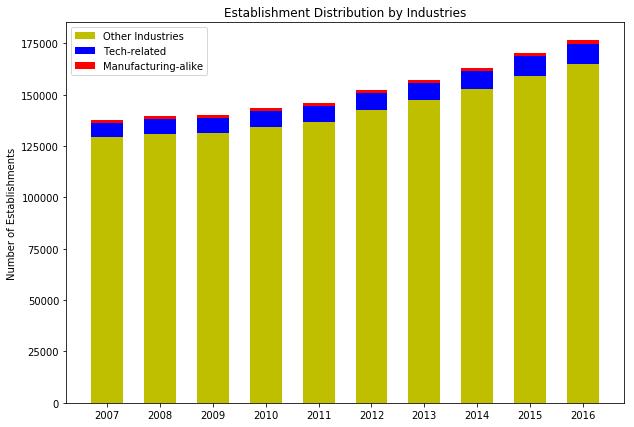

In [231]:
import numpy as np
N=len(index_bar)
ind = np.arange(N)
width = 0.6
fig, br = plt.subplots(figsize=(10,7))

p1 = br.bar(ind, barchart_data['Other Industries'], width, color='y')
p2 = br.bar(ind, barchart_data['Tech-related'], width, bottom=barchart_data['Other Industries'], color='b')
p3 = br.bar(ind, barchart_data['Manufacturing-alike'], width, 
             bottom=np.array(barchart_data['Other Industries'])+np.array( barchart_data['Tech-related']), color='r')


br.set_ylabel('Number of Establishments')
br.set_title('Establishment Distribution by Industries')
plt.xticks(ind, index_bar)
br.legend((p1[0], p2[0], p3[0]), ('Other Industries', 'Tech-related', 'Manufacturing-alike'))

fig.savefig('Plots/bar_chart.png')
fig.show()

# Merging data into one dataframe

In [74]:
#Manufacturing-Employment
jobs_df_78_emp_m=pd.merge(jobs_2007_filtered_emp_new_manuf, jobs_2008_filtered_emp_new_manuf, on='Metro Area', how='inner', suffixes=['_2007', '_2008'])
jobs_df_910_emp_m=pd.merge(jobs_2009_filtered_emp_new_manuf, jobs_2010_filtered_emp_new_manuf, on='Metro Area', how='inner',suffixes=['_2009', '_2010'])
jobs_df_1112_emp_m=pd.merge(jobs_2011_filtered_emp_new_manuf, jobs_2012_filtered_emp_new_manuf, on='Metro Area', how='inner', suffixes=['_2011', '_2012'])
jobs_df_1314_emp_m=pd.merge(jobs_2013_filtered_emp_new_manuf, jobs_2014_filtered_emp_new_manuf, on='Metro Area', how='inner', suffixes=['_2013', '_2014'])
jobs_df_1516_emp_m=pd.merge(jobs_2015_filtered_emp_new_manuf, jobs_2016_filtered_emp_new_manuf, on='Metro Area', how='inner', suffixes=['_2015', '_2016'])

#merging combined dataframes
jobs_df_7_10_emp_m=pd.merge(jobs_df_78_emp_m, jobs_df_910_emp_m, on='Metro Area', how='inner')
jobs_df_11_14_emp_m=pd.merge(jobs_df_1112_emp_m, jobs_df_1314_emp_m, on='Metro Area', how='inner')
jobs_df_7_14_emp_m=pd.merge(jobs_df_7_10_emp_m, jobs_df_11_14_emp_m, on='Metro Area', how='inner')

jobs_df_emp_m=pd.merge(jobs_df_7_14_emp_m, jobs_df_1516_emp_m, on='Metro Area', how='inner')
jobs_df_emp_m_pivot=jobs_df_emp_m.transpose()
jobs_df_emp_m_pivot.head()


Metro Area,Austin,Boston,Chicago,Detroit,Houston,New York,San Francisco
Manufacturing-alike_2007,49980,180264,467257,229988,271581,429788,133888
Manufacturing-alike_2008,47683,176500,465669,221478,251970,411856,137737
Manufacturing-alike_2009,43958,160109,409638,181746,246600,364653,127022
Manufacturing-alike_2010,36697,152243,383679,167210,229034,341465,115266
Manufacturing-alike_2011,38525,150606,386184,185454,238608,340520,109481


In [75]:
#Tech-Employment
jobs_df_78_emp_t=pd.merge(jobs_2007_filtered_emp_new_tech, jobs_2008_filtered_emp_new_tech, on='Metro Area', how='inner', suffixes=['_2007', '_2008'])
jobs_df_910_emp_t=pd.merge(jobs_2009_filtered_emp_new_tech, jobs_2010_filtered_emp_new_tech, on='Metro Area', how='inner',suffixes=['_2009', '_2010'])
jobs_df_1112_emp_t=pd.merge(jobs_2011_filtered_emp_new_tech, jobs_2012_filtered_emp_new_tech, on='Metro Area', how='inner', suffixes=['_2011', '_2012'])
jobs_df_1314_emp_t=pd.merge(jobs_2013_filtered_emp_new_tech, jobs_2014_filtered_emp_new_tech, on='Metro Area', how='inner', suffixes=['_2013', '_2014'])
jobs_df_1516_emp_t=pd.merge(jobs_2015_filtered_emp_new_tech, jobs_2016_filtered_emp_new_tech, on='Metro Area', how='inner', suffixes=['_2015', '_2016'])

#merging combined dataframes
jobs_df_7_10_emp_t=pd.merge(jobs_df_78_emp_t, jobs_df_910_emp_t, on='Metro Area', how='inner')
jobs_df_11_14_emp_t=pd.merge(jobs_df_1112_emp_t, jobs_df_1314_emp_t, on='Metro Area', how='inner')
jobs_df_7_14_emp_t=pd.merge(jobs_df_7_10_emp_t, jobs_df_11_14_emp_t, on='Metro Area', how='inner')

jobs_df_emp_t=pd.merge(jobs_df_7_14_emp_t, jobs_df_1516_emp_t, on='Metro Area', how='inner')
jobs_df_emp_t_pivot=jobs_df_emp_t.transpose()
jobs_df_emp_t_pivot.head()

Metro Area,Austin,Boston,Chicago,Detroit,Houston,New York,San Francisco
Tech-related_2007,85816,321534,420325,217898,236356,1002682,331095
Tech-related_2008,90004,320757,429109,207927,242743,1013600,337191
Tech-related_2009,90031,311240,415396,195837,229014,983957,310134
Tech-related_2010,88488,304272,400661,187926,217624,951409,309942
Tech-related_2011,88549,302066,398412,195666,225687,956253,298784


In [76]:
#Manufacturing-Establishments
jobs_df_78_est_m=pd.merge(jobs_2007_filtered_est_new_manuf, jobs_2008_filtered_est_new_manuf, on='Metro Area', how='inner', suffixes=['_2007', '_2008'])
jobs_df_910_est_m=pd.merge(jobs_2009_filtered_est_new_manuf, jobs_2010_filtered_est_new_manuf, on='Metro Area', how='inner',suffixes=['_2009', '_2010'])
jobs_df_1112_est_m=pd.merge(jobs_2011_filtered_est_new_manuf, jobs_2012_filtered_est_new_manuf, on='Metro Area', how='inner', suffixes=['_2011', '_2012'])
jobs_df_1314_est_m=pd.merge(jobs_2013_filtered_est_new_manuf, jobs_2014_filtered_est_new_manuf, on='Metro Area', how='inner', suffixes=['_2013', '_2014'])
jobs_df_1516_est_m=pd.merge(jobs_2015_filtered_est_new_manuf, jobs_2016_filtered_est_new_manuf, on='Metro Area', how='inner', suffixes=['_2015', '_2016'])

#merging combined dataframes
jobs_df_7_10_est_m=pd.merge(jobs_df_78_est_m, jobs_df_910_est_m, on='Metro Area', how='inner')
jobs_df_11_14_est_m=pd.merge(jobs_df_1112_est_m, jobs_df_1314_est_m, on='Metro Area', how='inner')
jobs_df_7_14_est_m=pd.merge(jobs_df_7_10_est_m, jobs_df_11_14_est_m, on='Metro Area', how='inner')

jobs_df_est_m=pd.merge(jobs_df_7_14_est_m, jobs_df_1516_est_m, on='Metro Area', how='inner')
jobs_df_est_m_pivot=jobs_df_est_m.transpose()
jobs_df_est_m_pivot.head()


Metro Area,Austin,Boston,Chicago,Detroit,Houston,New York,San Francisco
Manufacturing-alike_2007,1406,5096,12076,5980,6625,18682,4475
Manufacturing-alike_2008,1446,5048,11827,5857,6726,18086,4388
Manufacturing-alike_2009,1403,4781,11257,5523,6522,16986,4106
Manufacturing-alike_2010,1406,4615,10830,5359,6458,16442,4010
Manufacturing-alike_2011,1431,4532,10694,5366,6594,16109,3963


In [77]:
#Tech-Establishments
jobs_df_78_est_t=pd.merge(jobs_2007_filtered_est_new_tech, jobs_2008_filtered_est_new_tech, on='Metro Area', how='inner', suffixes=['_2007', '_2008'])
jobs_df_910_est_t=pd.merge(jobs_2009_filtered_est_new_tech, jobs_2010_filtered_est_new_tech, on='Metro Area', how='inner',suffixes=['_2009', '_2010'])
jobs_df_1112_est_t=pd.merge(jobs_2011_filtered_est_new_tech, jobs_2012_filtered_est_new_tech, on='Metro Area', how='inner', suffixes=['_2011', '_2012'])
jobs_df_1314_est_t=pd.merge(jobs_2013_filtered_est_new_tech, jobs_2014_filtered_est_new_tech, on='Metro Area', how='inner', suffixes=['_2013', '_2014'])
jobs_df_1516_est_t=pd.merge(jobs_2015_filtered_est_new_tech, jobs_2016_filtered_est_new_tech, on='Metro Area', how='inner', suffixes=['_2015', '_2016'])

#merging combined dataframes
jobs_df_7_10_est_t=pd.merge(jobs_df_78_est_t, jobs_df_910_est_t, on='Metro Area', how='inner')
jobs_df_11_14_est_t=pd.merge(jobs_df_1112_est_t, jobs_df_1314_est_t, on='Metro Area', how='inner')
jobs_df_7_14_est_t=pd.merge(jobs_df_7_10_est_t, jobs_df_11_14_est_t, on='Metro Area', how='inner')

jobs_df_est_t=pd.merge(jobs_df_7_14_est_t, jobs_df_1516_est_t, on='Metro Area', how='inner')
jobs_df_est_t_pivot=jobs_df_est_t.transpose()
jobs_df_est_t_pivot.head()


Metro Area,Austin,Boston,Chicago,Detroit,Houston,New York,San Francisco
Tech-related_2007,7246,21089,38129,13825,17966,81622,22640
Tech-related_2008,7274,20514,37342,13275,17635,79447,22080
Tech-related_2009,7342,20028,36789,12828,17697,78060,21862
Tech-related_2010,7681,19932,37024,12836,17946,78796,22109
Tech-related_2011,7887,19817,36850,12783,18253,78713,22345


In [78]:
#Manufacturing-Payroll
jobs_df_78_pay_m=pd.merge(jobs_2007_filtered_pay_new_manuf, jobs_2008_filtered_pay_new_manuf, on='Metro Area', how='inner', suffixes=['_2007', '_2008'])
jobs_df_910_pay_m=pd.merge(jobs_2009_filtered_pay_new_manuf, jobs_2010_filtered_pay_new_manuf, on='Metro Area', how='inner',suffixes=['_2009', '_2010'])
jobs_df_1112_pay_m=pd.merge(jobs_2011_filtered_pay_new_manuf, jobs_2012_filtered_pay_new_manuf, on='Metro Area', how='inner', suffixes=['_2011', '_2012'])
jobs_df_1314_pay_m=pd.merge(jobs_2013_filtered_pay_new_manuf, jobs_2014_filtered_pay_new_manuf, on='Metro Area', how='inner', suffixes=['_2013', '_2014'])
jobs_df_1516_pay_m=pd.merge(jobs_2015_filtered_pay_new_manuf, jobs_2016_filtered_pay_new_manuf, on='Metro Area', how='inner', suffixes=['_2015', '_2016'])

#merging combined dataframes
jobs_df_7_10_pay_m=pd.merge(jobs_df_78_pay_m, jobs_df_910_pay_m, on='Metro Area', how='inner')
jobs_df_11_14_pay_m=pd.merge(jobs_df_1112_pay_m, jobs_df_1314_pay_m, on='Metro Area', how='inner')
jobs_df_7_14_pay_m=pd.merge(jobs_df_7_10_pay_m, jobs_df_11_14_pay_m, on='Metro Area', how='inner')

jobs_df_pay_m=pd.merge(jobs_df_7_14_pay_m, jobs_df_1516_pay_m, on='Metro Area', how='inner')
jobs_df_pay_m_pivot=jobs_df_pay_m.transpose()
jobs_df_pay_m_pivot.head()


Metro Area,Austin,Boston,Chicago,Detroit,Houston,New York,San Francisco
Manufacturing-alike_2007,2694951,11644816,24645988,13188265,16026854,22029905,9595701
Manufacturing-alike_2008,2741223,11036613,25024902,12014768,17633313,21136401,9743563
Manufacturing-alike_2009,2468423,9966571,21181704,9505103,16549629,18814347,9299498
Manufacturing-alike_2010,2125858,9915789,21738481,10003738,17088597,18626084,8792242
Manufacturing-alike_2011,2449808,10684470,22505292,11129118,19129710,19116853,8323903


In [79]:
#Tech-Payroll
jobs_df_78_pay_t=pd.merge(jobs_2007_filtered_pay_new_tech, jobs_2008_filtered_pay_new_tech, on='Metro Area', how='inner', suffixes=['_2007', '_2008'])
jobs_df_910_pay_t=pd.merge(jobs_2009_filtered_pay_new_tech, jobs_2010_filtered_pay_new_tech, on='Metro Area', how='inner',suffixes=['_2009', '_2010'])
jobs_df_1112_pay_t=pd.merge(jobs_2011_filtered_pay_new_tech, jobs_2012_filtered_pay_new_tech, on='Metro Area', how='inner', suffixes=['_2011', '_2012'])
jobs_df_1314_pay_t=pd.merge(jobs_2013_filtered_pay_new_tech, jobs_2014_filtered_pay_new_tech, on='Metro Area', how='inner', suffixes=['_2013', '_2014'])
jobs_df_1516_pay_t=pd.merge(jobs_2015_filtered_pay_new_tech, jobs_2016_filtered_pay_new_tech, on='Metro Area', how='inner', suffixes=['_2015', '_2016'])

#merging combined dataframes
jobs_df_7_10_pay_t=pd.merge(jobs_df_78_pay_t, jobs_df_910_pay_t, on='Metro Area', how='inner')
jobs_df_11_14_pay_t=pd.merge(jobs_df_1112_pay_t, jobs_df_1314_pay_t, on='Metro Area', how='inner')
jobs_df_7_14_pay_t=pd.merge(jobs_df_7_10_pay_t, jobs_df_11_14_pay_t, on='Metro Area', how='inner')

jobs_df_pay_t=pd.merge(jobs_df_7_14_pay_t, jobs_df_1516_pay_t, on='Metro Area', how='inner')
jobs_df_pay_t_pivot=jobs_df_pay_t.transpose()
jobs_df_pay_t_pivot.head()


Metro Area,Austin,Boston,Chicago,Detroit,Houston,New York,San Francisco
Tech-related_2007,6028079,27934274,31310123,14732233,18021323,83692485,29747216
Tech-related_2008,6418472,29026649,32850751,14534167,19483526,86983410,31291005
Tech-related_2009,6719465,27890454,31344809,13764399,17831647,83937208,28697254
Tech-related_2010,6894313,28769859,31618352,13820650,17499034,84293509,30696640
Tech-related_2011,7000837,29678883,32247112,14180670,19310817,87731836,32180231


# Population Data

In [80]:
file_pop_20002009_df=pd.read_csv("Idea1/population_20002010.csv",encoding ='latin-1')
file_pop_20002009_df.head(10)

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,NAME,STNAME,ESTIMATESBASE2000,POPESTIMATE2000,POPESTIMATE2001,POPESTIMATE2002,POPESTIMATE2003,POPESTIMATE2004,POPESTIMATE2005,POPESTIMATE2006,POPESTIMATE2007,POPESTIMATE2008,POPESTIMATE2009,CENSUS2010POP,POPESTIMATE2010
0,40,1,0,0,0,Alabama,Alabama,4447207,4452173,4467634,4480089,4503491,4530729,4569805,4628981,4672840,4718206,4757938,4779736,4785298
1,162,1,0,124,0,Abbeville city,Alabama,2989,2985,2941,2909,2882,2857,2820,2807,2784,2742,2714,2688,2689
2,162,1,0,460,0,Adamsville city,Alabama,5033,5021,4960,4894,4841,4784,4728,4687,4633,4594,4558,4522,4523
3,162,1,0,484,0,Addison town,Alabama,698,701,701,708,714,722,729,741,750,752,759,758,755
4,162,1,0,676,0,Akron town,Alabama,488,485,473,454,442,426,416,404,395,384,369,356,355
5,162,1,0,820,0,Alabaster city,Alabama,23965,24116,24674,25223,25957,26739,27504,28462,29020,29630,30107,30352,30468
6,162,1,0,988,0,Albertville city,Alabama,17376,17440,17601,17948,18294,18608,19051,19565,20014,20482,20875,21160,21209
7,162,1,0,1132,0,Alexander City city,Alabama,15129,15090,14964,14812,14738,14721,14685,14804,14848,14922,14964,14875,14839
8,162,1,0,1228,0,Aliceville city,Alabama,2628,2624,2623,2619,2581,2563,2540,2532,2515,2511,2494,2486,2481
9,162,1,0,1396,0,Allgood town,Alabama,662,661,658,655,654,650,645,643,641,638,631,622,622


In [81]:
file_pop_20002009_cleaned_df=file_pop_20002009_df.drop(columns=['SUMLEV', 'STATE',"COUNTY","PLACE","COUSUB","ESTIMATESBASE2000","CENSUS2010POP","POPESTIMATE2010"])
file_pop_20002009_cleaned_df=file_pop_20002009_cleaned_df.rename(columns={"NAME":"CITY","STNAME":"STATE",
                                             "POPESTIMATE2000":"2000",
                                            "POPESTIMATE2001":"2001",
                                            "POPESTIMATE2002":"2002",
                                            "POPESTIMATE2003":"2003",
                                            "POPESTIMATE2004":"2004",
                                            "POPESTIMATE2005":"2005",
                                            "POPESTIMATE2006":"2006",
                                            "POPESTIMATE2007":"2007",
                                            "POPESTIMATE2008":"2008",
                                            "POPESTIMATE2009":"2009"})
cities=["Austin city","Houston city","San Francisco city","Detroit city","Chicago city","Boston city","New York city"]
states=["Texas","California","Illinois","Massachusetts","Michigan","New York"]
#file_pop_20002009_cleaned_df.head()

file_pop_20002009_cleaned_df=file_pop_20002009_cleaned_df[file_pop_20002009_cleaned_df[["CITY"]].isin(cities).any(axis=1)]
file_pop_20002009_cleaned_df=file_pop_20002009_cleaned_df[file_pop_20002009_cleaned_df[["STATE"]].isin(states).any(axis=1)]
file_pop_20002009_cleaned_df.drop_duplicates(subset='CITY', keep='first',inplace=True)  
file_pop_20002009_cleaned_df.reset_index(drop=True,inplace=True)
file_pop_20002009_cleaned_df

,CITY,STATE,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,San Francisco city,California,777885,780865,772723,766160,761325,763016,768650,778673,791152,801922
1,Chicago city,Illinois,2891582,2874477,2847266,2819117,2786291,2752523,2720181,2703991,2697359,2697006
2,Boston city,Massachusetts,591844,598208,599301,595864,591166,587260,587816,593136,600685,612669
3,Detroit city,Michigan,946240,927136,905996,884411,861186,837407,811922,784998,756383,731155
4,New York city,New York,8017608,8059813,8072000,8068073,8043366,8013368,7993906,8013775,8068195,8131574
5,Austin city,Texas,675775,691119,688644,690293,696973,708423,730373,749641,764945,780172
6,Houston city,Texas,1974324,1979589,1990408,1992464,1991817,1995773,2038721,2044612,2060477,2087334


In [82]:
file_pop_20102018_df=pd.read_csv("Idea1/population_20102018.csv",encoding ='latin-1')
file_pop_20102018_df.head(10)

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,...,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018
0,40,1,0,0,0,0,0,A,Alabama,Alabama,...,4780138,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871
1,162,1,0,124,0,0,0,A,Abbeville city,Alabama,...,2688,2684,2677,2629,2612,2595,2588,2573,2566,2563
2,162,1,0,460,0,0,0,A,Adamsville city,Alabama,...,4516,4510,4496,4474,4453,4432,4406,4373,4342,4325
3,162,1,0,484,0,0,0,A,Addison town,Alabama,...,754,751,751,744,743,740,735,734,728,724
4,162,1,0,676,0,0,0,A,Akron town,Alabama,...,356,355,345,345,341,339,337,332,332,330
5,162,1,0,820,0,0,0,A,Alabaster city,Alabama,...,31091,31186,31346,31653,31946,32149,32739,32984,33223,33340
6,162,1,0,988,0,0,0,A,Albertville city,Alabama,...,21209,21224,21391,21436,21425,21356,21395,21451,21493,21568
7,162,1,0,1132,0,0,0,A,Alexander City city,Alabama,...,14984,14930,14890,14764,14836,14787,14658,14618,14572,14467
8,162,1,0,1228,0,0,0,A,Aliceville city,Alabama,...,2481,2480,2426,2418,2392,2368,2359,2343,2335,2301
9,162,1,0,1396,0,0,0,A,Allgood town,Alabama,...,622,622,623,622,621,622,621,621,622,622


In [83]:
file_pop_20102018_cleaned_df=file_pop_20102018_df.drop(columns=['SUMLEV', 'STATE',"COUNTY","PLACE","COUSUB","CONCIT","PRIMGEO_FLAG","FUNCSTAT","ESTIMATESBASE2010","CENSUS2010POP"])
file_pop_20102018_cleaned_df=file_pop_20102018_cleaned_df.rename(columns={"NAME":"CITY","STNAME":"STATE",
                                             "POPESTIMATE2010":"2010",
                                            "POPESTIMATE2011":"2011",
                                            "POPESTIMATE2012":"2012",
                                            "POPESTIMATE2013":"2013",
                                            "POPESTIMATE2014":"2014",
                                            "POPESTIMATE2015":"2015",
                                            "POPESTIMATE2016":"2016",
                                            "POPESTIMATE2017":"2017",
                                            "POPESTIMATE2018":"2018"})
                                            

cities=["Austin city","Houston city","San Francisco city","Detroit city","Chicago city","Boston city","New York city"]
states=["Texas","California","Illinois","Massachusetts","Michigan","New York"]

file_pop_20102018_cleaned_df=file_pop_20102018_cleaned_df[file_pop_20102018_cleaned_df[["CITY"]].isin(cities).any(axis=1)]
file_pop_20102018_cleaned_df=file_pop_20102018_cleaned_df[file_pop_20102018_cleaned_df[["STATE"]].isin(states).any(axis=1)]
file_pop_20102018_cleaned_df.drop_duplicates(subset='CITY', keep='first',inplace=True)  
file_pop_20102018_cleaned_df.reset_index(drop=True,inplace=True)
file_pop_20102018_cleaned_df

,CITY,STATE,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,San Francisco city,California,805550,815677,829027,839841,851116,863836,872795,879166,883305
1,Chicago city,Illinois,2697529,2708209,2719735,2726772,2728524,2726215,2718946,2713067,2705994
2,Boston city,Massachusetts,621074,630480,643003,653103,663017,670791,680470,688276,694583
3,Detroit city,Michigan,711120,705043,700159,691883,682669,679305,676883,674188,672662
4,New York city,New York,8190355,8272963,8348032,8398739,8437387,8468181,8475976,8438271,8398748
5,Austin city,Texas,806423,828694,854841,875463,901734,921545,939768,951750,964254
6,Houston city,Texas,2098446,2124143,2160086,2198280,2240982,2286630,2309752,2317445,2325502


In [84]:
pop_2000_2018_df = pd.merge(file_pop_20002009_cleaned_df, file_pop_20102018_cleaned_df, on="CITY")
pop_2000_2018_df=pop_2000_2018_df.drop(columns=["STATE_y"])
pop_2000_2018_df=pop_2000_2018_df.rename(columns={"STATE_x":"STATE"})
pop_2000_2018_df

,CITY,STATE,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,San Francisco city,California,777885,780865,772723,766160,761325,763016,768650,778673,...,801922,805550,815677,829027,839841,851116,863836,872795,879166,883305
1,Chicago city,Illinois,2891582,2874477,2847266,2819117,2786291,2752523,2720181,2703991,...,2697006,2697529,2708209,2719735,2726772,2728524,2726215,2718946,2713067,2705994
2,Boston city,Massachusetts,591844,598208,599301,595864,591166,587260,587816,593136,...,612669,621074,630480,643003,653103,663017,670791,680470,688276,694583
3,Detroit city,Michigan,946240,927136,905996,884411,861186,837407,811922,784998,...,731155,711120,705043,700159,691883,682669,679305,676883,674188,672662
4,New York city,New York,8017608,8059813,8072000,8068073,8043366,8013368,7993906,8013775,...,8131574,8190355,8272963,8348032,8398739,8437387,8468181,8475976,8438271,8398748
5,Austin city,Texas,675775,691119,688644,690293,696973,708423,730373,749641,...,780172,806423,828694,854841,875463,901734,921545,939768,951750,964254
6,Houston city,Texas,1974324,1979589,1990408,1992464,1991817,1995773,2038721,2044612,...,2087334,2098446,2124143,2160086,2198280,2240982,2286630,2309752,2317445,2325502


In [85]:
pop_2007_2016_df=pop_2000_2018_df.drop(columns=["2000","2001","2002","2003","2004","2005","2006","2017","2018"])
pop_2007_2016_df

,CITY,STATE,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,San Francisco city,California,778673,791152,801922,805550,815677,829027,839841,851116,863836,872795
1,Chicago city,Illinois,2703991,2697359,2697006,2697529,2708209,2719735,2726772,2728524,2726215,2718946
2,Boston city,Massachusetts,593136,600685,612669,621074,630480,643003,653103,663017,670791,680470
3,Detroit city,Michigan,784998,756383,731155,711120,705043,700159,691883,682669,679305,676883
4,New York city,New York,8013775,8068195,8131574,8190355,8272963,8348032,8398739,8437387,8468181,8475976
5,Austin city,Texas,749641,764945,780172,806423,828694,854841,875463,901734,921545,939768
6,Houston city,Texas,2044612,2060477,2087334,2098446,2124143,2160086,2198280,2240982,2286630,2309752


In [86]:
pop_2007_2016_reset_df=df2 = pd.melt(pop_2007_2016_df, id_vars=["CITY", "STATE"], 
                  var_name="YEAR", value_name="POPULATION")
pop_2007_2016_reset_df.head()

,CITY,STATE,YEAR,POPULATION
0,San Francisco city,California,2007,778673
1,Chicago city,Illinois,2007,2703991
2,Boston city,Massachusetts,2007,593136
3,Detroit city,Michigan,2007,784998
4,New York city,New York,2007,8013775


In [87]:
pop_2007_2016_pivot_df=pop_2007_2016_reset_df.pivot(index='YEAR', columns='CITY', values='POPULATION')
pop_2007_2016_pivot_df.head()


CITY,Austin city,Boston city,Chicago city,Detroit city,Houston city,New York city,San Francisco city
YEAR,,,,,,,
2007,749641,593136,2703991,784998,2044612,8013775,778673
2008,764945,600685,2697359,756383,2060477,8068195,791152
2009,780172,612669,2697006,731155,2087334,8131574,801922
2010,806423,621074,2697529,711120,2098446,8190355,805550
2011,828694,630480,2708209,705043,2124143,8272963,815677


# oil prices analysis

In [88]:
url='https://pkgstore.datahub.io/core/oil-prices/brent-year_json/data/753e72173ba5f14ddec831533cc9b418/brent-year_json.json'
response=requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

[
    {
        "Date": "1987-06-30",
        "Price": "18.53"
    },
    {
        "Date": "1988-06-30",
        "Price": "14.91"
    },
    {
        "Date": "1989-06-30",
        "Price": "18.23"
    },
    {
        "Date": "1990-06-30",
        "Price": "23.76"
    },
    {
        "Date": "1991-06-30",
        "Price": "20.04"
    },
    {
        "Date": "1992-06-30",
        "Price": "19.32"
    },
    {
        "Date": "1993-06-30",
        "Price": "17.01"
    },
    {
        "Date": "1994-06-30",
        "Price": "15.86"
    },
    {
        "Date": "1995-06-30",
        "Price": "17.02"
    },
    {
        "Date": "1996-06-30",
        "Price": "20.64"
    },
    {
        "Date": "1997-06-30",
        "Price": "19.11"
    },
    {
        "Date": "1998-06-30",
        "Price": "12.76"
    },
    {
        "Date": "1999-06-30",
        "Price": "17.9"
    },
    {
        "Date": "2000-06-30",
        "Price": "28.66"
    },
    {
        "Date": "2001-06-30",
        "Pr

In [89]:
dates=[]
prices=[]

for x in range(0,len(response)):
    dates.append(response[x]["Date"])
    prices.append(response[x]['Price'])
    
#creating DataFrame for Oil Prices
oil_price=pd.DataFrame({"Date": dates,
                      "Price": prices})

oil_price.head()

,Date,Price
0,1987-06-30,18.53
1,1988-06-30,14.91
2,1989-06-30,18.23
3,1990-06-30,23.76
4,1991-06-30,20.04


In [90]:
m=dates.index('2017-06-30')
k=len(oil_price['Date'])
j=k-m
oil_price_cut=oil_price[:-j]
oil_price_cut.head()

,Date,Price
0,1987-06-30,18.53
1,1988-06-30,14.91
2,1989-06-30,18.23
3,1990-06-30,23.76
4,1991-06-30,20.04


In [91]:
n=dates.index('2005-06-30')
oil_price_df=oil_price_cut.drop(oil_price_cut.index[0:n+1]).reset_index()
oil_price_df=oil_price_df[['Date', 'Price']]
oil_price_df = oil_price_df.astype({"Price": float})

oil_price_df.head(20)
oil_price_df.dtypes

Date      object
Price    float64
dtype: object

# Plotting

FileNotFoundError: [Errno 2] No such file or directory: 'Plots/oil_price.png'

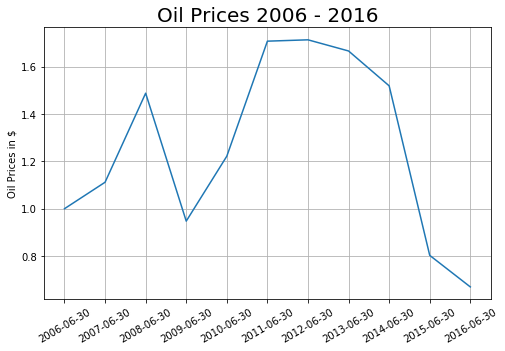

In [92]:
fig, ax = plt.subplots(figsize=(8,5))
y_axis = oil_price_df["Price"]/oil_price_df["Price"][0]
ax.plot(oil_price_df["Date"], y_axis)
plt.xticks( rotation='30')
ax.set_ylabel('Oil Prices in $')
ax.set_title('Oil Prices 2006 - 2016', fontsize=20)
plt.grid(True)

fig.savefig('Plots/oil_price.png')
plt.show()

In [ ]:
#Austin
fig1, (ax1, ax2)=plt.subplots(2,1, sharex=True, figsize=(10,10))
x_axis = pop_2007_2016_pivot_df.index
ax1.plot(x_axis, (pop_2007_2016_pivot_df["Austin city"]/pop_2007_2016_pivot_df["Austin city"][0]), color='b', label="Population")
ax1.plot(x_axis, (jobs_df_emp_m_pivot['Austin']/jobs_df_emp_m_pivot['Austin'][0]), color="g", label="Employment")
ax1.plot(x_axis, (jobs_df_est_m_pivot['Austin']/jobs_df_est_m_pivot['Austin'][0]), color="r", label="Establishments")
ax1.plot(x_axis, (jobs_df_pay_m_pivot['Austin']/jobs_df_pay_m_pivot['Austin'][0]), color="y", label="Payroll")
ax1.grid(True)
ax1.legend(loc="best")

ax2.plot(x_axis, (pop_2007_2016_pivot_df["Austin city"]/pop_2007_2016_pivot_df["Austin city"][0]), color='b', label="Population")
ax2.plot(x_axis, (jobs_df_emp_t_pivot['Austin']/jobs_df_emp_t_pivot['Austin'][0]), color="g", label="Employment")
ax2.plot(x_axis, (jobs_df_est_t_pivot['Austin']/jobs_df_est_t_pivot['Austin'][0]), color="r", label="Establishments")
ax2.plot(x_axis, (jobs_df_pay_t_pivot['Austin']/jobs_df_pay_t_pivot['Austin'][0]), color="y", label="Payroll")
ax2.grid(True)
ax2.legend(loc="best")

ax2.set_xlabel('Years')
ax1.set_ylabel('Manufacturing Data, index')
ax2.set_ylabel('Tech Data, index')
ax1.set_title('Austin', fontsize=20)

fig1.savefig('Plots/Austin.png')
fig1.show()

In [ ]:
#Boston
fig2, (ax1, ax2)=plt.subplots(2,1, sharex=True, figsize=(10,10))
x_axis = pop_2007_2016_pivot_df.index
ax1.plot(x_axis, (pop_2007_2016_pivot_df["Boston city"]/pop_2007_2016_pivot_df["Boston city"][0]), color='b', label="Population")
ax1.plot(x_axis, (jobs_df_emp_m_pivot['Boston']/jobs_df_emp_m_pivot['Boston'][0]), color="g", label="Employment")
ax1.plot(x_axis, (jobs_df_est_m_pivot['Boston']/jobs_df_est_m_pivot['Boston'][0]), color="r", label="Establishments")
ax1.plot(x_axis, (jobs_df_pay_m_pivot['Boston']/jobs_df_pay_m_pivot['Boston'][0]), color="y", label="Payroll")
ax1.grid(True)
ax1.legend(loc="best")

ax2.plot(x_axis, (pop_2007_2016_pivot_df["Boston city"]/pop_2007_2016_pivot_df["Boston city"][0]), color='b', label="Population")
ax2.plot(x_axis, (jobs_df_emp_t_pivot['Boston']/jobs_df_emp_t_pivot['Boston'][0]), color="g", label="Employment")
ax2.plot(x_axis, (jobs_df_est_t_pivot['Boston']/jobs_df_est_t_pivot['Boston'][0]), color="r", label="Establishments")
ax2.plot(x_axis, (jobs_df_pay_t_pivot['Boston']/jobs_df_pay_t_pivot['Boston'][0]), color="y", label="Payroll")
ax2.grid(True)
ax2.legend(loc="best")

ax2.set_xlabel('Years')
ax1.set_ylabel('Manufacturing Data, index')
ax2.set_ylabel('Tech Data, index')
ax1.set_title('Boston', fontsize=20)

fig2.savefig('Plots/Boston.png')
fig2.show()

In [ ]:
#Chicago
fig3, (ax1, ax2)=plt.subplots(2,1, sharex=True, figsize=(10,10))
x_axis = pop_2007_2016_pivot_df.index
ax1.plot(x_axis, (pop_2007_2016_pivot_df["Chicago city"]/pop_2007_2016_pivot_df["Chicago city"][0]), color='b', label="Population")
ax1.plot(x_axis, (jobs_df_emp_m_pivot['Chicago']/jobs_df_emp_m_pivot['Chicago'][0]), color="g", label="Employment")
ax1.plot(x_axis, (jobs_df_est_m_pivot['Chicago']/jobs_df_est_m_pivot['Chicago'][0]), color="r", label="Establishments")
ax1.plot(x_axis, (jobs_df_pay_m_pivot['Chicago']/jobs_df_pay_m_pivot['Chicago'][0]), color="y", label="Payroll")
ax1.grid(True)
ax1.legend(loc="best")

ax2.plot(x_axis, (pop_2007_2016_pivot_df["Chicago city"]/pop_2007_2016_pivot_df["Chicago city"][0]), color='b', label="Population")
ax2.plot(x_axis, (jobs_df_emp_t_pivot['Chicago']/jobs_df_emp_t_pivot['Chicago'][0]), color="g", label="Employment")
ax2.plot(x_axis, (jobs_df_est_t_pivot['Chicago']/jobs_df_est_t_pivot['Chicago'][0]), color="r", label="Establishments")
ax2.plot(x_axis, (jobs_df_pay_t_pivot['Chicago']/jobs_df_pay_t_pivot['Chicago'][0]), color="y", label="Payroll")
ax2.grid(True)
ax2.legend(loc="best")

ax2.set_xlabel('Years')
ax1.set_ylabel('Manufacturing Data, index')
ax2.set_ylabel('Tech Data, index')
ax1.set_title('Chicago', fontsize=20)

fig3.savefig('Plots/Chicago.png')
fig3.show()

In [ ]:
#Detroit
fig4, (ax1, ax2)=plt.subplots(2,1, sharex=True, figsize=(10,10))
x_axis = pop_2007_2016_pivot_df.index
ax1.plot(x_axis, (pop_2007_2016_pivot_df["Detroit city"]/pop_2007_2016_pivot_df["Detroit city"][0]), color='b', label="Population")
ax1.plot(x_axis, (jobs_df_emp_m_pivot['Detroit']/jobs_df_emp_m_pivot['Detroit'][0]), color="g", label="Employment")
ax1.plot(x_axis, (jobs_df_est_m_pivot['Detroit']/jobs_df_est_m_pivot['Detroit'][0]), color="r", label="Establishments")
ax1.plot(x_axis, (jobs_df_pay_m_pivot['Detroit']/jobs_df_pay_m_pivot['Detroit'][0]), color="y", label="Payroll")
ax1.grid(True)
ax1.legend(loc="best")

ax2.plot(x_axis, (pop_2007_2016_pivot_df["Detroit city"]/pop_2007_2016_pivot_df["Detroit city"][0]), color='b', label="Population")
ax2.plot(x_axis, (jobs_df_emp_t_pivot['Detroit']/jobs_df_emp_t_pivot['Detroit'][0]), color="g", label="Employment")
ax2.plot(x_axis, (jobs_df_est_t_pivot['Detroit']/jobs_df_est_t_pivot['Detroit'][0]), color="r", label="Establishments")
ax2.plot(x_axis, (jobs_df_pay_t_pivot['Detroit']/jobs_df_pay_t_pivot['Detroit'][0]), color="y", label="Payroll")
ax2.grid(True)
ax2.legend(loc="best")

ax2.set_xlabel('Years')
ax1.set_ylabel('Manufacturing Data, index')
ax2.set_ylabel('Tech Data, index')
ax1.set_title('Detroit', fontsize=20)

fig4.savefig('Plots/Detroit.png')
fig4.show()

In [ ]:
#Houston
fig5, (ax1, ax2)=plt.subplots(2,1, sharex=True, figsize=(10,10))
x_axis = pop_2007_2016_pivot_df.index
ax1.plot(x_axis, (pop_2007_2016_pivot_df["Houston city"]/pop_2007_2016_pivot_df["Houston city"][0]), color='b', label="Population")
ax1.plot(x_axis, (jobs_df_emp_m_pivot['Houston']/jobs_df_emp_m_pivot['Houston'][0]), color="g", label="Employment")
ax1.plot(x_axis, (jobs_df_est_m_pivot['Houston']/jobs_df_est_m_pivot['Houston'][0]), color="r", label="Establishments")
ax1.plot(x_axis, (jobs_df_pay_m_pivot['Houston']/jobs_df_pay_m_pivot['Houston'][0]), color="y", label="Payroll")
ax1.grid(True)
ax1.legend(loc="best")

ax2.plot(x_axis, (pop_2007_2016_pivot_df["Houston city"]/pop_2007_2016_pivot_df["Houston city"][0]), color='b', label="Population")
ax2.plot(x_axis, (jobs_df_emp_t_pivot['Houston']/jobs_df_emp_t_pivot['Houston'][0]), color="g", label="Employment")
ax2.plot(x_axis, (jobs_df_est_t_pivot['Houston']/jobs_df_est_t_pivot['Houston'][0]), color="r", label="Establishments")
ax2.plot(x_axis, (jobs_df_pay_t_pivot['Houston']/jobs_df_pay_t_pivot['Houston'][0]), color="y", label="Payroll")
ax2.grid(True)
ax2.legend(loc="best")

ax2.set_xlabel('Years')
ax1.set_ylabel('Manufacturing Data, index')
ax2.set_ylabel('Tech Data, index')
ax1.set_title('Houston', fontsize=20)


fig5.savefig('Plots/Houston.png')
fig5.show()

In [ ]:
#New York
fig6, (ax1, ax2)=plt.subplots(2,1, sharex=True, figsize=(10,10))
x_axis = pop_2007_2016_pivot_df.index
ax1.plot(x_axis, (pop_2007_2016_pivot_df["New York city"]/pop_2007_2016_pivot_df["New York city"][0]), color='b', label="Population")
ax1.plot(x_axis, (jobs_df_emp_m_pivot['New York']/jobs_df_emp_m_pivot['New York'][0]), color="g", label="Employment")
ax1.plot(x_axis, (jobs_df_est_m_pivot['New York']/jobs_df_est_m_pivot['New York'][0]), color="r", label="Establishments")
ax1.plot(x_axis, (jobs_df_pay_m_pivot['New York']/jobs_df_pay_m_pivot['New York'][0]), color="y", label="Payroll")
ax1.grid(True)
ax1.legend(loc="best")

ax2.plot(x_axis, (pop_2007_2016_pivot_df["New York city"]/pop_2007_2016_pivot_df["New York city"][0]), color='b', label="Population")
ax2.plot(x_axis, (jobs_df_emp_t_pivot['New York']/jobs_df_emp_t_pivot['New York'][0]), color="g", label="Employment")
ax2.plot(x_axis, (jobs_df_est_t_pivot['New York']/jobs_df_est_t_pivot['New York'][0]), color="r", label="Establishments")
ax2.plot(x_axis, (jobs_df_pay_t_pivot['New York']/jobs_df_pay_t_pivot['New York'][0]), color="y", label="Payroll")
ax2.grid(True)
ax2.legend(loc="best")

ax2.set_xlabel('Years')
ax1.set_ylabel('Manufacturing Data, index')
ax2.set_ylabel('Tech Data, index')
ax1.set_title('New York', fontsize=20)

fig6.savefig('Plots/New_York.png')
fig6.show()

In [ ]:
#San Francisco
fig7, (ax1, ax2)=plt.subplots(2,1, sharex=True, figsize=(10,10))
x_axis = pop_2007_2016_pivot_df.index
ax1.plot(x_axis, (pop_2007_2016_pivot_df["San Francisco city"]/pop_2007_2016_pivot_df["San Francisco city"][0]), color='b', label="Population")
ax1.plot(x_axis, (jobs_df_emp_m_pivot['San Francisco']/jobs_df_emp_m_pivot['San Francisco'][0]), color="g", label="Employment")
ax1.plot(x_axis, (jobs_df_est_m_pivot['San Francisco']/jobs_df_est_m_pivot['San Francisco'][0]), color="r", label="Establishments")
ax1.plot(x_axis, (jobs_df_pay_m_pivot['San Francisco']/jobs_df_pay_m_pivot['San Francisco'][0]), color="y", label="Payroll")
ax1.grid(True)
ax1.legend(loc="best")

ax2.plot(x_axis, (pop_2007_2016_pivot_df["San Francisco city"]/pop_2007_2016_pivot_df["San Francisco city"][0]), color='b', label="Population")
ax2.plot(x_axis, (jobs_df_emp_t_pivot['San Francisco']/jobs_df_emp_t_pivot['San Francisco'][0]), color="g", label="Employment")
ax2.plot(x_axis, (jobs_df_est_t_pivot['San Francisco']/jobs_df_est_t_pivot['San Francisco'][0]), color="r", label="Establishments")
ax2.plot(x_axis, (jobs_df_pay_t_pivot['San Francisco']/jobs_df_pay_t_pivot['San Francisco'][0]), color="y", label="Payroll")
ax2.grid(True)
ax2.legend(loc="best")

ax2.set_xlabel('Years')
ax1.set_ylabel('Manufacturing Data, index')
ax2.set_ylabel('Tech Data, index')
ax1.set_title('San Francisco', fontsize=20)

fig7.savefig('Plots/San_Francisco.png')
fig7.show()